In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11005651353265908886
xla_global_id: -1
]


In [5]:
#{"R": [R], "D": [D],"H": [H], "F":[log10(f)],"RP": [RP]})
DATA = pd.read_csv("DATA/data.csv")
DATA.pop("Unnamed: 0")

ROW_NUM = len(DATA.index)
print(ROW_NUM)
TRAINING_NUM = int(ROW_NUM / 10 * 7)
VALIDATION_NUM = int(ROW_NUM / 20 * 3 )

TRAINING_DATA = DATA.iloc[ :TRAINING_NUM,:]
VALIDATION_DATA = DATA.iloc[TRAINING_NUM:TRAINING_NUM+VALIDATION_NUM,:]
TEST_DATA = DATA.iloc[TRAINING_NUM+VALIDATION_NUM:,:]
TRAINING_VAL = pd.DataFrame(TRAINING_DATA.pop('RP'))
VALIDATION_VAL = pd.DataFrame(VALIDATION_DATA.pop('RP'))
TEST_VAL = pd.DataFrame(TEST_DATA.pop('RP'))

DATA.pop('RP')


282240


0        -123.180388
1        -119.671868
2        -130.180711
3        -111.274042
4        -105.454858
             ...    
282235   -120.310835
282236   -114.146743
282237   -128.781605
282238   -112.158097
282239   -112.245129
Name: RP, Length: 282240, dtype: float64

In [6]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
min_max_scaler.fit(DATA)
joblib.dump(min_max_scaler, "MLP.scaler.gz") 

TRAINING_DATA = min_max_scaler.transform(TRAINING_DATA)
TRAINING_DATA = pd.DataFrame(TRAINING_DATA)
VALIDATION_DATA = min_max_scaler.transform(VALIDATION_DATA)
VALIDATION_DATA = pd.DataFrame(VALIDATION_DATA)
TEST_DATA = min_max_scaler.transform(TEST_DATA)
TEST_DATA = pd.DataFrame(TEST_DATA)

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_1
Epoch 1/100
   1/6174 [..............................] - ETA: 16:44 - loss: 106.5966

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 4s 695us/step - loss: 59.9546 - val_loss: 28.9694
Epoch 2/100
6174/6174 [==============================] - 4s 651us/step - loss: 19.9026 - val_loss: 14.6064
Epoch 3/100
6174/6174 [==============================] - 4s 653us/step - loss: 12.5966 - val_loss: 11.2972
Epoch 4/100
6174/6174 [==============================] - 4s 675us/step - loss: 10.3010 - val_loss: 9.6929
Epoch 5/100
6174/6174 [==============================] - 4s 701us/step - loss: 9.0735 - val_loss: 8.7163
Epoch 6/100
6174/6174 [==============================] - 4s 671us/step - loss: 8.2548 - val_loss: 8.0206
Epoch 7/100
6174/6174 [==============================] - 4s 653us/step - loss: 7.6622 - val_loss: 7.5092
Epoch 8/100
6174/6174 [==============================] - 4s 659us/step - loss: 7.2239 - val_loss: 7.1297
Epoch 9/100
6174/6174 [==============================] - 4s 664us/step - loss: 6.8916 - val_loss: 6.8273
Epoch 10/100
6174/6174 [==============================] - 4s

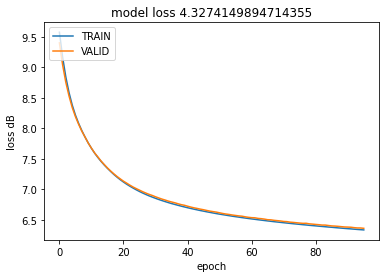

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_2
Epoch 1/100
   1/6174 [..............................] - ETA: 16:36 - loss: 105.8439

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 813us/step - loss: 44.7478 - val_loss: 18.9911
Epoch 2/100
6174/6174 [==============================] - 5s 809us/step - loss: 14.9076 - val_loss: 12.2831
Epoch 3/100
6174/6174 [==============================] - 4s 658us/step - loss: 11.0106 - val_loss: 9.9149
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.2383 - val_loss: 8.6360
Epoch 5/100
6174/6174 [==============================] - 4s 667us/step - loss: 8.2441 - val_loss: 7.8903
Epoch 6/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.6368 - val_loss: 7.4011
Epoch 7/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.2153 - val_loss: 7.0424
Epoch 8/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.8981 - val_loss: 6.7678
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.6504 - val_loss: 6.5522
Epoch 10/100
6174/6174 [==============================] - 4s 6

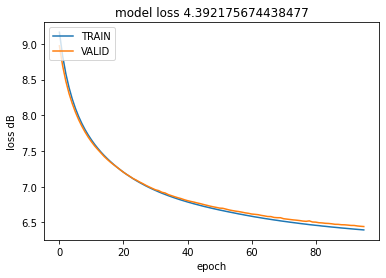

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_3
Epoch 1/100
   1/6174 [..............................] - ETA: 16:36 - loss: 118.7742

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 815us/step - loss: 49.5938 - val_loss: 23.9820
Epoch 2/100
6174/6174 [==============================] - 5s 782us/step - loss: 18.6012 - val_loss: 14.7107
Epoch 3/100
6174/6174 [==============================] - 4s 662us/step - loss: 12.7294 - val_loss: 10.9190
Epoch 4/100
6174/6174 [==============================] - 4s 660us/step - loss: 10.0316 - val_loss: 9.1879
Epoch 5/100
6174/6174 [==============================] - 4s 670us/step - loss: 8.6897 - val_loss: 8.2218
Epoch 6/100
6174/6174 [==============================] - 4s 657us/step - loss: 7.8990 - val_loss: 7.6057
Epoch 7/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.3786 - val_loss: 7.1777
Epoch 8/100
6174/6174 [==============================] - 4s 655us/step - loss: 7.0068 - val_loss: 6.8555
Epoch 9/100
6174/6174 [==============================] - 4s 661us/step - loss: 6.7195 - val_loss: 6.6040
Epoch 10/100
6174/6174 [==============================] - 4s

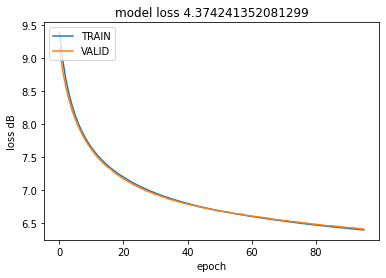

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_4
Epoch 1/100
   1/6174 [..............................] - ETA: 16:24 - loss: 190.4403

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 821us/step - loss: 78.6844 - val_loss: 25.1112
Epoch 2/100
6174/6174 [==============================] - 5s 764us/step - loss: 16.8781 - val_loss: 12.6838
Epoch 3/100
6174/6174 [==============================] - 4s 652us/step - loss: 11.2761 - val_loss: 10.2661
Epoch 4/100
6174/6174 [==============================] - 4s 662us/step - loss: 9.5742 - val_loss: 9.0012
Epoch 5/100
6174/6174 [==============================] - 4s 655us/step - loss: 8.5586 - val_loss: 8.1886
Epoch 6/100
6174/6174 [==============================] - 4s 658us/step - loss: 7.8767 - val_loss: 7.6316
Epoch 7/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.3970 - val_loss: 7.2303
Epoch 8/100
6174/6174 [==============================] - 4s 656us/step - loss: 7.0414 - val_loss: 6.9249
Epoch 9/100
6174/6174 [==============================] - 4s 664us/step - loss: 6.7676 - val_loss: 6.6888
Epoch 10/100
6174/6174 [==============================] - 4s 

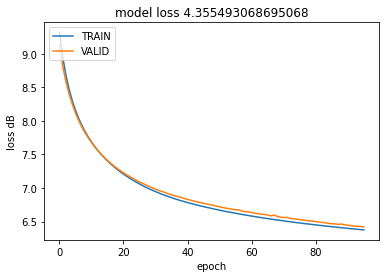

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_5
Epoch 1/100
   1/6174 [..............................] - ETA: 16:28 - loss: 56.8319

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 810us/step - loss: 26.5120 - val_loss: 14.5731
Epoch 2/100
6174/6174 [==============================] - 5s 780us/step - loss: 12.2549 - val_loss: 10.6291
Epoch 3/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.7528 - val_loss: 9.0139
Epoch 4/100
6174/6174 [==============================] - 4s 654us/step - loss: 8.5926 - val_loss: 8.1699
Epoch 5/100
6174/6174 [==============================] - 4s 656us/step - loss: 7.8968 - val_loss: 7.5984
Epoch 6/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.4005 - val_loss: 7.1774
Epoch 7/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.0232 - val_loss: 6.8526
Epoch 8/100
6174/6174 [==============================] - 4s 668us/step - loss: 6.7287 - val_loss: 6.5988
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.4904 - val_loss: 6.3842
Epoch 10/100
6174/6174 [==============================] - 4s 66

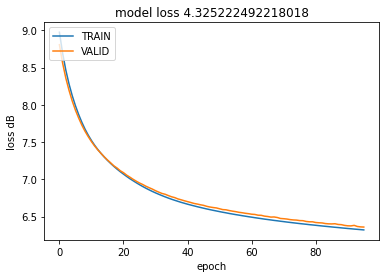

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_6
Epoch 1/100
   1/6174 [..............................] - ETA: 16:00 - loss: 74.4886

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 811us/step - loss: 38.7642 - val_loss: 20.8765
Epoch 2/100
6174/6174 [==============================] - 5s 783us/step - loss: 15.7553 - val_loss: 11.8367
Epoch 3/100
6174/6174 [==============================] - 4s 650us/step - loss: 10.3532 - val_loss: 9.2505
Epoch 4/100
6174/6174 [==============================] - 4s 649us/step - loss: 8.6849 - val_loss: 8.1751
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.8456 - val_loss: 7.5510
Epoch 6/100
6174/6174 [==============================] - 4s 654us/step - loss: 7.3164 - val_loss: 7.1150
Epoch 7/100
6174/6174 [==============================] - 4s 668us/step - loss: 6.9361 - val_loss: 6.7926
Epoch 8/100
6174/6174 [==============================] - 4s 655us/step - loss: 6.6447 - val_loss: 6.5438
Epoch 9/100
6174/6174 [==============================] - 4s 654us/step - loss: 6.4179 - val_loss: 6.3485
Epoch 10/100
6174/6174 [==============================] - 4s 6

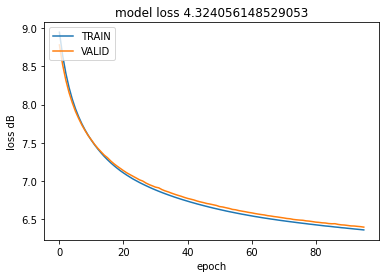

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_7
Epoch 1/100
   1/6174 [..............................] - ETA: 16:18 - loss: 124.8465

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 813us/step - loss: 58.8022 - val_loss: 32.3935
Epoch 2/100
6174/6174 [==============================] - 5s 760us/step - loss: 23.7608 - val_loss: 17.9393
Epoch 3/100
6174/6174 [==============================] - 4s 659us/step - loss: 15.0549 - val_loss: 12.6591
Epoch 4/100
6174/6174 [==============================] - 4s 663us/step - loss: 11.2168 - val_loss: 10.1966
Epoch 5/100
6174/6174 [==============================] - 4s 657us/step - loss: 9.4256 - val_loss: 8.9176
Epoch 6/100
6174/6174 [==============================] - 4s 662us/step - loss: 8.3979 - val_loss: 8.0831
Epoch 7/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.7030 - val_loss: 7.4846
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.2015 - val_loss: 7.0416
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.8343 - val_loss: 6.7128
Epoch 10/100
6174/6174 [==============================] - 4

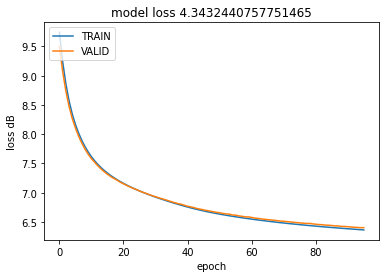

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_8
Epoch 1/100
   1/6174 [..............................] - ETA: 16:11 - loss: 66.3704

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 808us/step - loss: 29.4163 - val_loss: 16.8926
Epoch 2/100
6174/6174 [==============================] - 5s 798us/step - loss: 13.5793 - val_loss: 11.0108
Epoch 3/100
6174/6174 [==============================] - 4s 656us/step - loss: 9.8587 - val_loss: 8.9337
Epoch 4/100
6174/6174 [==============================] - 4s 653us/step - loss: 8.4184 - val_loss: 7.9518
Epoch 5/100
6174/6174 [==============================] - 4s 656us/step - loss: 7.6412 - val_loss: 7.3508
Epoch 6/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.1474 - val_loss: 6.9565
Epoch 7/100
6174/6174 [==============================] - 4s 662us/step - loss: 6.8105 - val_loss: 6.6743
Epoch 8/100
6174/6174 [==============================] - 4s 652us/step - loss: 6.5573 - val_loss: 6.4594
Epoch 9/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.3540 - val_loss: 6.2747
Epoch 10/100
6174/6174 [==============================] - 4s 65

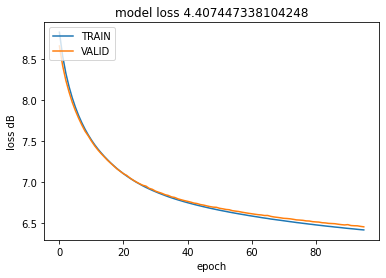

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_9
Epoch 1/100
   1/6174 [..............................] - ETA: 16:51 - loss: 209.6233

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 806us/step - loss: 88.2990 - val_loss: 28.0560
Epoch 2/100
6174/6174 [==============================] - 5s 775us/step - loss: 17.8246 - val_loss: 12.8177
Epoch 3/100
6174/6174 [==============================] - 4s 657us/step - loss: 11.4629 - val_loss: 10.3828
Epoch 4/100
6174/6174 [==============================] - 4s 657us/step - loss: 9.7565 - val_loss: 9.1207
Epoch 5/100
6174/6174 [==============================] - 4s 658us/step - loss: 8.7448 - val_loss: 8.3161
Epoch 6/100
6174/6174 [==============================] - 4s 663us/step - loss: 8.0760 - val_loss: 7.7548
Epoch 7/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.5896 - val_loss: 7.3398
Epoch 8/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.2271 - val_loss: 7.0265
Epoch 9/100
6174/6174 [==============================] - 4s 658us/step - loss: 6.9508 - val_loss: 6.7877
Epoch 10/100
6174/6174 [==============================] - 4s 

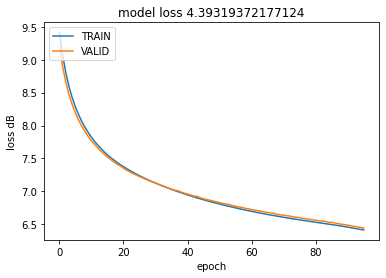

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_10
Epoch 1/100
   1/6174 [..............................] - ETA: 16:53 - loss: 88.9353

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 805us/step - loss: 32.3426 - val_loss: 19.5761
Epoch 2/100
6174/6174 [==============================] - 4s 663us/step - loss: 15.6491 - val_loss: 12.9513
Epoch 3/100
6174/6174 [==============================] - 5s 784us/step - loss: 11.6133 - val_loss: 10.4712
Epoch 4/100
6174/6174 [==============================] - 4s 665us/step - loss: 9.7441 - val_loss: 9.0761
Epoch 5/100
6174/6174 [==============================] - 4s 658us/step - loss: 8.6336 - val_loss: 8.2233
Epoch 6/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.9299 - val_loss: 7.6504
Epoch 7/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.4487 - val_loss: 7.2456
Epoch 8/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.0994 - val_loss: 6.9422
Epoch 9/100
6174/6174 [==============================] - 4s 670us/step - loss: 6.8335 - val_loss: 6.7065
Epoch 10/100
6174/6174 [==============================] - 4s 

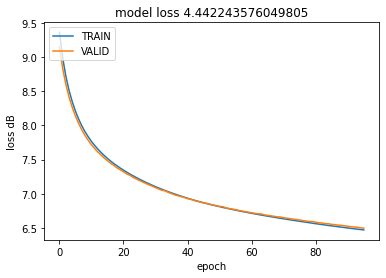

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_11
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 8s 1ms/step - loss: 59.9081 - val_loss: 20.7507
Epoch 2/100
6174/6174 [==============================] - 4s 656us/step - loss: 15.8112 - val_loss: 12.7924
Epoch 3/100
6174/6174 [==============================] - 4s 658us/step - loss: 11.2437 - val_loss: 9.9779
Epoch 4/100
6174/6174 [==============================] - 4s 687us/step - loss: 9.0693 - val_loss: 8.4729
Epoch 5/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.9300 - val_loss: 7.6437
Epoch 6/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.2745 - val_loss: 7.1131
Epoch 7/100
6174/6174 [==============================] - 4s 650us/step - loss: 6.8445 - val_loss: 6.7498
Epoch 8/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.5489 - val_loss: 6.4918
Epoch 9/100
6174/6174 [==============================] - 4s 651us/step - loss: 6.3316 - val_loss: 6.2937
Epoch 10/100
6174/6174 [==============================] - 4s 664

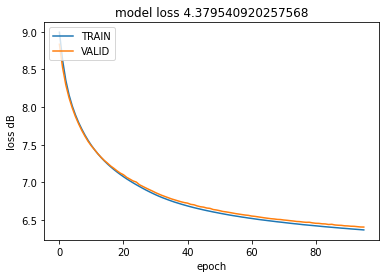

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_12
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 4s 678us/step - loss: 57.1361 - val_loss: 25.5708
Epoch 2/100
6174/6174 [==============================] - 5s 835us/step - loss: 18.0133 - val_loss: 13.2298
Epoch 3/100
6174/6174 [==============================] - 4s 656us/step - loss: 11.3320 - val_loss: 9.9937
Epoch 4/100
6174/6174 [==============================] - 4s 659us/step - loss: 9.2952 - val_loss: 8.7080
Epoch 5/100
6174/6174 [==============================] - 4s 656us/step - loss: 8.3369 - val_loss: 7.9889
Epoch 6/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.7440 - val_loss: 7.5089
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.3241 - val_loss: 7.1559
Epoch 8/100
6174/6174 [==============================] - 4s 657us/step - loss: 7.0104 - val_loss: 6.8868
Epoch 9/100
6174/6174 [==============================] - 4s 652us/step - loss: 6.7597 - val_loss: 6.6720
Epoch 10/100
6174/6174 [==============================] - 4s 6

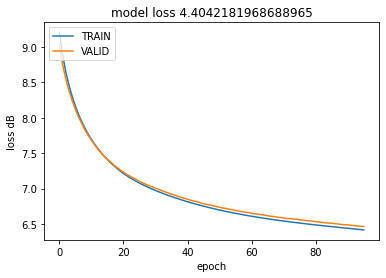

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_13
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 810us/step - loss: 113.3545 - val_loss: 29.6051
Epoch 2/100
6174/6174 [==============================] - 5s 773us/step - loss: 20.7980 - val_loss: 15.5076
Epoch 3/100
6174/6174 [==============================] - 4s 657us/step - loss: 13.1460 - val_loss: 11.2665
Epoch 4/100
6174/6174 [==============================] - 4s 657us/step - loss: 10.2023 - val_loss: 9.3014
Epoch 5/100
6174/6174 [==============================] - 4s 657us/step - loss: 8.7574 - val_loss: 8.2585
Epoch 6/100
6174/6174 [==============================] - 4s 654us/step - loss: 7.9454 - val_loss: 7.6197
Epoch 7/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.4156 - val_loss: 7.1753
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.0323 - val_loss: 6.8512
Epoch 9/100
6174/6174 [==============================] - 4s 661us/step - loss: 6.7527 - val_loss: 6.6087
Epoch 10/100
6174/6174 [==============================] - 4

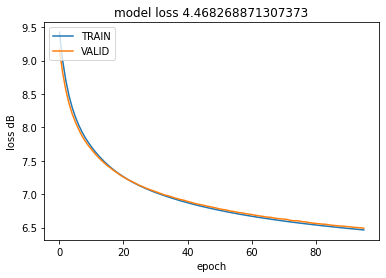

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_14
Epoch 1/100
   1/6174 [..............................] - ETA: 16:12 - loss: 204.9972

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 816us/step - loss: 102.7095 - val_loss: 34.5969
Epoch 2/100
6174/6174 [==============================] - 5s 747us/step - loss: 20.7271 - val_loss: 15.0047
Epoch 3/100
6174/6174 [==============================] - 4s 663us/step - loss: 13.1721 - val_loss: 11.8013
Epoch 4/100
6174/6174 [==============================] - 4s 654us/step - loss: 10.9722 - val_loss: 10.2562
Epoch 5/100
6174/6174 [==============================] - 4s 655us/step - loss: 9.7449 - val_loss: 9.2712
Epoch 6/100
6174/6174 [==============================] - 4s 682us/step - loss: 8.9090 - val_loss: 8.5664
Epoch 7/100
6174/6174 [==============================] - 4s 663us/step - loss: 8.2816 - val_loss: 8.0193
Epoch 8/100
6174/6174 [==============================] - 4s 656us/step - loss: 7.7913 - val_loss: 7.5866
Epoch 9/100
6174/6174 [==============================] - 4s 657us/step - loss: 7.3953 - val_loss: 7.2302
Epoch 10/100
6174/6174 [==============================] - 

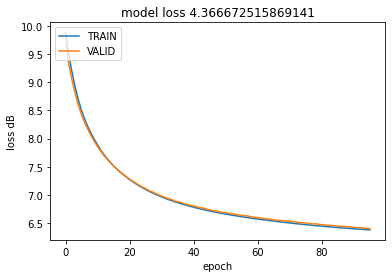

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_15
Epoch 1/100
   1/6174 [..............................] - ETA: 16:32 - loss: 100.5120

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 709us/step - loss: 43.4090 - val_loss: 19.1875
Epoch 2/100
6174/6174 [==============================] - 4s 680us/step - loss: 15.9291 - val_loss: 13.3011
Epoch 3/100
6174/6174 [==============================] - 5s 851us/step - loss: 11.9226 - val_loss: 10.5955
Epoch 4/100
6174/6174 [==============================] - 4s 664us/step - loss: 9.7796 - val_loss: 9.0526
Epoch 5/100
6174/6174 [==============================] - 4s 669us/step - loss: 8.5321 - val_loss: 8.0996
Epoch 6/100
6174/6174 [==============================] - 4s 671us/step - loss: 7.7560 - val_loss: 7.4672
Epoch 7/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.2298 - val_loss: 7.0309
Epoch 8/100
6174/6174 [==============================] - 4s 677us/step - loss: 6.8501 - val_loss: 6.6970
Epoch 9/100
6174/6174 [==============================] - 4s 676us/step - loss: 6.5611 - val_loss: 6.4393
Epoch 10/100
6174/6174 [==============================] - 4s 

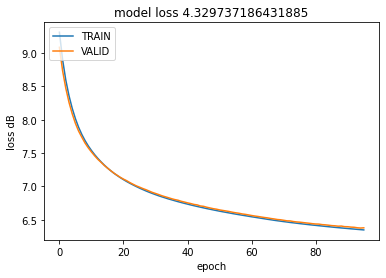

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_16
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 822us/step - loss: 35.9286 - val_loss: 21.3880
Epoch 2/100
6174/6174 [==============================] - 5s 757us/step - loss: 16.6940 - val_loss: 13.8277
Epoch 3/100
6174/6174 [==============================] - 4s 663us/step - loss: 12.1367 - val_loss: 10.9118
Epoch 4/100
6174/6174 [==============================] - 4s 682us/step - loss: 9.9828 - val_loss: 9.3101
Epoch 5/100
6174/6174 [==============================] - 4s 656us/step - loss: 8.7492 - val_loss: 8.3388
Epoch 6/100
6174/6174 [==============================] - 4s 685us/step - loss: 7.9463 - val_loss: 7.6713
Epoch 7/100
6174/6174 [==============================] - 4s 685us/step - loss: 7.3772 - val_loss: 7.1922
Epoch 8/100
6174/6174 [==============================] - 4s 657us/step - loss: 6.9680 - val_loss: 6.8398
Epoch 9/100
6174/6174 [==============================] - 5s 734us/step - loss: 6.6629 - val_loss: 6.5701
Epoch 10/100
6174/6174 [==============================] - 4s 

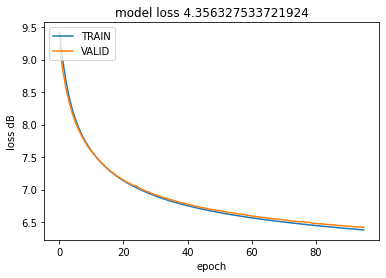

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_17
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 805us/step - loss: 52.4774 - val_loss: 17.9896
Epoch 2/100
6174/6174 [==============================] - 5s 796us/step - loss: 14.1281 - val_loss: 11.6273
Epoch 3/100
6174/6174 [==============================] - 4s 679us/step - loss: 10.5312 - val_loss: 9.5095
Epoch 4/100
6174/6174 [==============================] - 4s 664us/step - loss: 9.0290 - val_loss: 8.4638
Epoch 5/100
6174/6174 [==============================] - 4s 664us/step - loss: 8.1983 - val_loss: 7.8425
Epoch 6/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.6598 - val_loss: 7.3995
Epoch 7/100
6174/6174 [==============================] - 4s 662us/step - loss: 7.2663 - val_loss: 7.0794
Epoch 8/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.9664 - val_loss: 6.8263
Epoch 9/100
6174/6174 [==============================] - 4s 668us/step - loss: 6.7292 - val_loss: 6.6239
Epoch 10/100
6174/6174 [==============================] - 4s 6

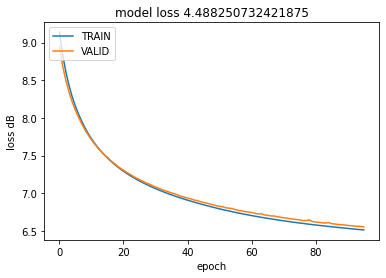

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_18
Epoch 1/100
   1/6174 [..............................] - ETA: 16:14 - loss: 109.2673

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 811us/step - loss: 45.6022 - val_loss: 21.0231
Epoch 2/100
6174/6174 [==============================] - 5s 745us/step - loss: 15.9017 - val_loss: 12.4606
Epoch 3/100
6174/6174 [==============================] - 4s 661us/step - loss: 11.0168 - val_loss: 9.7163
Epoch 4/100
6174/6174 [==============================] - 4s 664us/step - loss: 9.0573 - val_loss: 8.3799
Epoch 5/100
6174/6174 [==============================] - 4s 658us/step - loss: 8.0269 - val_loss: 7.6317
Epoch 6/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.4074 - val_loss: 7.1398
Epoch 7/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.9803 - val_loss: 6.7979
Epoch 8/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.6757 - val_loss: 6.5368
Epoch 9/100
6174/6174 [==============================] - 4s 670us/step - loss: 6.4407 - val_loss: 6.3419
Epoch 10/100
6174/6174 [==============================] - 4s 6

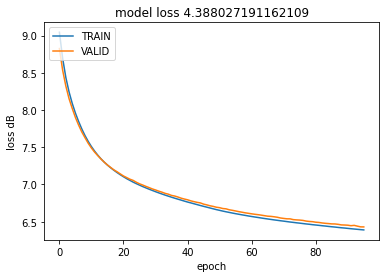

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_19
Epoch 1/100
   1/6174 [..............................] - ETA: 16:11 - loss: 147.3887

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 811us/step - loss: 48.6512 - val_loss: 19.3132
Epoch 2/100
6174/6174 [==============================] - 5s 795us/step - loss: 14.7466 - val_loss: 12.1218
Epoch 3/100
6174/6174 [==============================] - 4s 661us/step - loss: 10.9494 - val_loss: 9.9362
Epoch 4/100
6174/6174 [==============================] - 4s 660us/step - loss: 9.4071 - val_loss: 8.8363
Epoch 5/100
6174/6174 [==============================] - 4s 666us/step - loss: 8.5369 - val_loss: 8.1616
Epoch 6/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.9514 - val_loss: 7.6755
Epoch 7/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.5226 - val_loss: 7.3114
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.1939 - val_loss: 7.0292
Epoch 9/100
6174/6174 [==============================] - 4s 657us/step - loss: 6.9317 - val_loss: 6.7998
Epoch 10/100
6174/6174 [==============================] - 4s 6

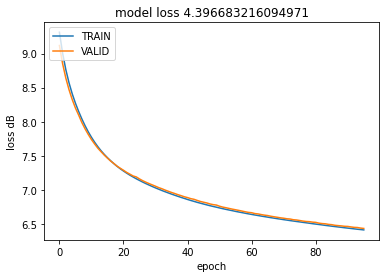

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_20
Epoch 1/100
   1/6174 [..............................] - ETA: 16:40 - loss: 108.5256

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 859us/step - loss: 46.6024 - val_loss: 21.6016
Epoch 2/100
6174/6174 [==============================] - 5s 743us/step - loss: 15.9953 - val_loss: 12.9329
Epoch 3/100
6174/6174 [==============================] - 4s 655us/step - loss: 11.4422 - val_loss: 10.2439
Epoch 4/100
6174/6174 [==============================] - 4s 663us/step - loss: 9.5146 - val_loss: 8.8339
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.4345 - val_loss: 7.9993
Epoch 6/100
6174/6174 [==============================] - 4s 658us/step - loss: 7.7489 - val_loss: 7.4472
Epoch 7/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.2810 - val_loss: 7.0579
Epoch 8/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.9332 - val_loss: 6.7593
Epoch 9/100
6174/6174 [==============================] - 4s 678us/step - loss: 6.6611 - val_loss: 6.5247
Epoch 10/100
6174/6174 [==============================] - 4s 

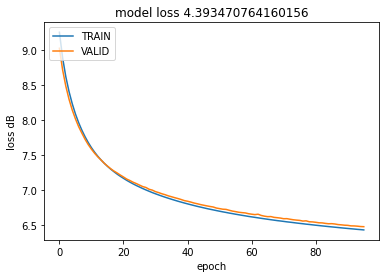

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_21
Epoch 1/100
   1/6174 [..............................] - ETA: 16:27 - loss: 259.3109

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 813us/step - loss: 129.7728 - val_loss: 36.2110
Epoch 2/100
6174/6174 [==============================] - 5s 751us/step - loss: 19.9173 - val_loss: 14.3451
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 12.4430 - val_loss: 11.0002
Epoch 4/100
6174/6174 [==============================] - 4s 652us/step - loss: 10.0917 - val_loss: 9.3742
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.8587 - val_loss: 8.4220
Epoch 6/100
6174/6174 [==============================] - 4s 676us/step - loss: 8.0878 - val_loss: 7.7767
Epoch 7/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.5529 - val_loss: 7.3174
Epoch 8/100
6174/6174 [==============================] - 4s 659us/step - loss: 7.1651 - val_loss: 6.9955
Epoch 9/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.8688 - val_loss: 6.7246
Epoch 10/100
6174/6174 [==============================] - 4

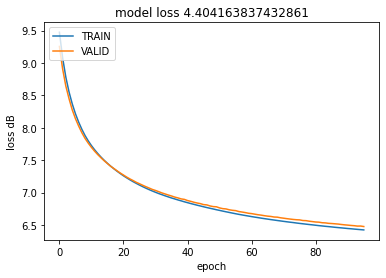

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_22
Epoch 1/100
   1/6174 [..............................] - ETA: 16:30 - loss: 102.8548

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 830us/step - loss: 50.1953 - val_loss: 23.3788
Epoch 2/100
6174/6174 [==============================] - 5s 786us/step - loss: 16.8978 - val_loss: 12.9875
Epoch 3/100
6174/6174 [==============================] - 4s 680us/step - loss: 11.4021 - val_loss: 9.9849
Epoch 4/100
6174/6174 [==============================] - 5s 750us/step - loss: 9.3533 - val_loss: 8.7005
Epoch 5/100
6174/6174 [==============================] - 4s 690us/step - loss: 8.3551 - val_loss: 7.9807
Epoch 6/100
6174/6174 [==============================] - 4s 672us/step - loss: 7.7444 - val_loss: 7.4907
Epoch 7/100
6174/6174 [==============================] - 4s 692us/step - loss: 7.3108 - val_loss: 7.1196
Epoch 8/100
6174/6174 [==============================] - 4s 724us/step - loss: 6.9821 - val_loss: 6.8362
Epoch 9/100
6174/6174 [==============================] - 4s 694us/step - loss: 6.7214 - val_loss: 6.6021
Epoch 10/100
6174/6174 [==============================] - 4s 7

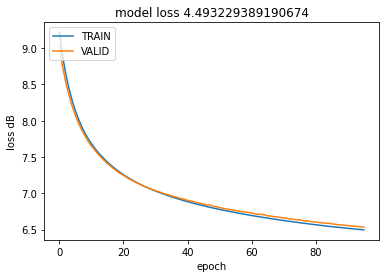

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_23
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 828us/step - loss: 38.6775 - val_loss: 17.9859
Epoch 2/100
6174/6174 [==============================] - 5s 803us/step - loss: 14.2671 - val_loss: 11.6911
Epoch 3/100
6174/6174 [==============================] - 4s 658us/step - loss: 10.4482 - val_loss: 9.5511
Epoch 4/100
6174/6174 [==============================] - 4s 675us/step - loss: 8.9399 - val_loss: 8.4854
Epoch 5/100
6174/6174 [==============================] - 4s 655us/step - loss: 8.0745 - val_loss: 7.7846
Epoch 6/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.4935 - val_loss: 7.3092
Epoch 7/100
6174/6174 [==============================] - 4s 672us/step - loss: 7.0938 - val_loss: 6.9727
Epoch 8/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.8056 - val_loss: 6.7198
Epoch 9/100
6174/6174 [==============================] - 4s 662us/step - loss: 6.5848 - val_loss: 6.5207
Epoch 10/100
6174/6174 [==============================] - 4s 6

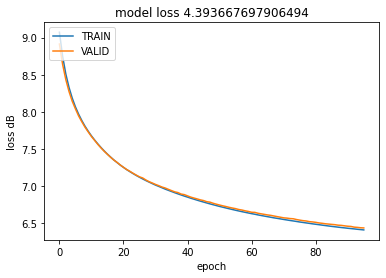

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_24
Epoch 1/100
   1/6174 [..............................] - ETA: 16:32 - loss: 121.6466

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 825us/step - loss: 42.1201 - val_loss: 18.5679
Epoch 2/100
6174/6174 [==============================] - 5s 768us/step - loss: 14.1554 - val_loss: 11.3834
Epoch 3/100
6174/6174 [==============================] - 4s 662us/step - loss: 10.1572 - val_loss: 9.2273
Epoch 4/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.6366 - val_loss: 8.1856
Epoch 5/100
6174/6174 [==============================] - 4s 672us/step - loss: 7.8494 - val_loss: 7.5864
Epoch 6/100
6174/6174 [==============================] - 4s 662us/step - loss: 7.3652 - val_loss: 7.1801
Epoch 7/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.0125 - val_loss: 6.8643
Epoch 8/100
6174/6174 [==============================] - 4s 655us/step - loss: 6.7272 - val_loss: 6.5948
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.4876 - val_loss: 6.3772
Epoch 10/100
6174/6174 [==============================] - 4s 6

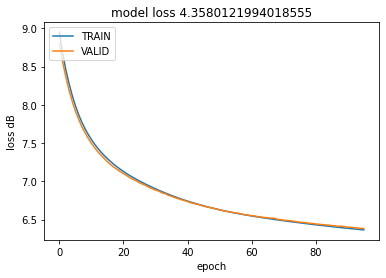

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_25
Epoch 1/100
   1/6174 [..............................] - ETA: 16:01 - loss: 120.4049

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 817us/step - loss: 41.8213 - val_loss: 18.7911
Epoch 2/100
6174/6174 [==============================] - 5s 790us/step - loss: 14.7133 - val_loss: 11.9541
Epoch 3/100
6174/6174 [==============================] - 4s 659us/step - loss: 10.8151 - val_loss: 9.6857
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.0946 - val_loss: 8.4553
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.1181 - val_loss: 7.7084
Epoch 6/100
6174/6174 [==============================] - 4s 655us/step - loss: 7.4885 - val_loss: 7.1931
Epoch 7/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.0538 - val_loss: 6.8315
Epoch 8/100
6174/6174 [==============================] - 4s 670us/step - loss: 6.7395 - val_loss: 6.5610
Epoch 9/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.4983 - val_loss: 6.3538
Epoch 10/100
6174/6174 [==============================] - 4s 6

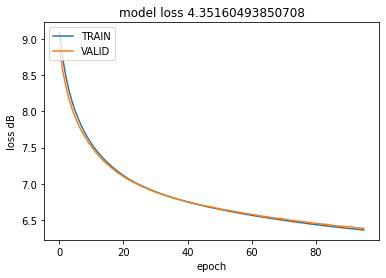

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_26
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 814us/step - loss: 68.9884 - val_loss: 21.7879
Epoch 2/100
6174/6174 [==============================] - 5s 789us/step - loss: 16.5390 - val_loss: 13.4479
Epoch 3/100
6174/6174 [==============================] - 4s 663us/step - loss: 12.1355 - val_loss: 11.0301
Epoch 4/100
6174/6174 [==============================] - 4s 649us/step - loss: 10.2761 - val_loss: 9.6591
Epoch 5/100
6174/6174 [==============================] - 4s 665us/step - loss: 9.1322 - val_loss: 8.7398
Epoch 6/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.3480 - val_loss: 8.0772
Epoch 7/100
6174/6174 [==============================] - 4s 676us/step - loss: 7.7776 - val_loss: 7.5817
Epoch 8/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.3506 - val_loss: 7.2030
Epoch 9/100
6174/6174 [==============================] - 4s 695us/step - loss: 7.0195 - val_loss: 6.9041
Epoch 10/100
6174/6174 [==============================] - 4s

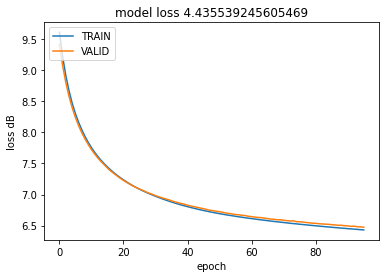

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_27
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 773us/step - loss: 36.8888 - val_loss: 17.1100
Epoch 2/100
6174/6174 [==============================] - 5s 768us/step - loss: 14.0093 - val_loss: 11.7566
Epoch 3/100
6174/6174 [==============================] - 4s 665us/step - loss: 10.8282 - val_loss: 9.8985
Epoch 4/100
6174/6174 [==============================] - 4s 658us/step - loss: 9.4161 - val_loss: 8.8297
Epoch 5/100
6174/6174 [==============================] - 4s 664us/step - loss: 8.5230 - val_loss: 8.0947
Epoch 6/100
6174/6174 [==============================] - 4s 686us/step - loss: 7.8777 - val_loss: 7.5416
Epoch 7/100
6174/6174 [==============================] - 4s 662us/step - loss: 7.3813 - val_loss: 7.1083
Epoch 8/100
6174/6174 [==============================] - 4s 651us/step - loss: 6.9869 - val_loss: 6.7630
Epoch 9/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.6711 - val_loss: 6.4828
Epoch 10/100
6174/6174 [==============================] - 4s 6

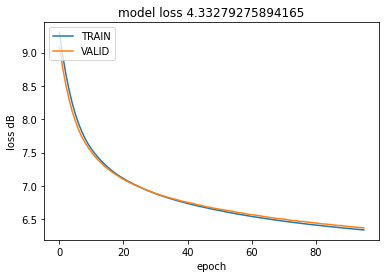

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_28
Epoch 1/100
   1/6174 [..............................] - ETA: 16:02 - loss: 265.5994

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 869us/step - loss: 134.5195 - val_loss: 38.6628
Epoch 2/100
6174/6174 [==============================] - 5s 758us/step - loss: 25.2571 - val_loss: 17.0818
Epoch 3/100
6174/6174 [==============================] - 4s 651us/step - loss: 13.8661 - val_loss: 11.6679
Epoch 4/100
6174/6174 [==============================] - 4s 669us/step - loss: 10.5316 - val_loss: 9.6765
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 9.0613 - val_loss: 8.5854
Epoch 6/100
6174/6174 [==============================] - 4s 672us/step - loss: 8.2001 - val_loss: 7.9014
Epoch 7/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.6373 - val_loss: 7.4255
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.2265 - val_loss: 7.0546
Epoch 9/100
6174/6174 [==============================] - 4s 677us/step - loss: 6.9020 - val_loss: 6.7586
Epoch 10/100
6174/6174 [==============================] - 4

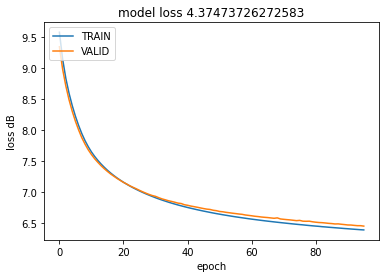

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_29
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 778us/step - loss: 25.3892 - val_loss: 17.1646
Epoch 2/100
6174/6174 [==============================] - 5s 804us/step - loss: 14.4066 - val_loss: 12.4619
Epoch 3/100
6174/6174 [==============================] - 5s 808us/step - loss: 11.1839 - val_loss: 10.2083
Epoch 4/100
6174/6174 [==============================] - 5s 743us/step - loss: 9.4652 - val_loss: 8.8956
Epoch 5/100
6174/6174 [==============================] - 4s 662us/step - loss: 8.4223 - val_loss: 8.0455
Epoch 6/100
6174/6174 [==============================] - 4s 678us/step - loss: 7.7295 - val_loss: 7.4847
Epoch 7/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.2478 - val_loss: 7.0814
Epoch 8/100
6174/6174 [==============================] - 4s 671us/step - loss: 6.8962 - val_loss: 6.7697
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.6216 - val_loss: 6.5342
Epoch 10/100
6174/6174 [==============================] - 4s 

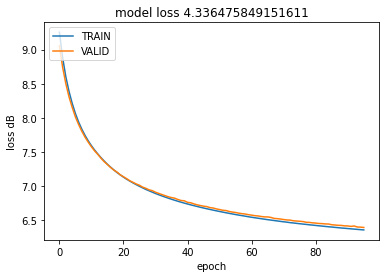

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_30
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 777us/step - loss: 50.4724 - val_loss: 19.0550
Epoch 2/100
6174/6174 [==============================] - 5s 828us/step - loss: 15.3909 - val_loss: 13.0626
Epoch 3/100
6174/6174 [==============================] - 4s 667us/step - loss: 11.8047 - val_loss: 10.7587
Epoch 4/100
6174/6174 [==============================] - 4s 658us/step - loss: 10.0354 - val_loss: 9.3959
Epoch 5/100
6174/6174 [==============================] - 4s 671us/step - loss: 8.9153 - val_loss: 8.4968
Epoch 6/100
6174/6174 [==============================] - 4s 670us/step - loss: 8.1488 - val_loss: 7.8645
Epoch 7/100
6174/6174 [==============================] - 4s 655us/step - loss: 7.6054 - val_loss: 7.4042
Epoch 8/100
6174/6174 [==============================] - 4s 676us/step - loss: 7.2058 - val_loss: 7.0565
Epoch 9/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.8972 - val_loss: 6.7869
Epoch 10/100
6174/6174 [==============================] - 4s

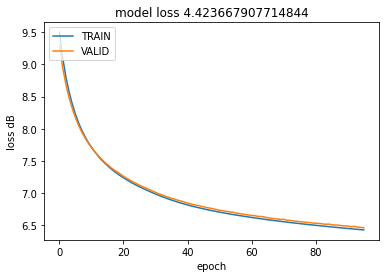

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_31
Epoch 1/100
   1/6174 [..............................] - ETA: 16:10 - loss: 125.3683

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 816us/step - loss: 56.2581 - val_loss: 27.0333
Epoch 2/100
6174/6174 [==============================] - 5s 791us/step - loss: 19.3763 - val_loss: 14.6397
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 12.4632 - val_loss: 10.8664
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.9106 - val_loss: 9.1481
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.5889 - val_loss: 8.1101
Epoch 6/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.7676 - val_loss: 7.4601
Epoch 7/100
6174/6174 [==============================] - 4s 658us/step - loss: 7.2475 - val_loss: 7.0430
Epoch 8/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.8957 - val_loss: 6.7425
Epoch 9/100
6174/6174 [==============================] - 4s 658us/step - loss: 6.6328 - val_loss: 6.5041
Epoch 10/100
6174/6174 [==============================] - 4s 

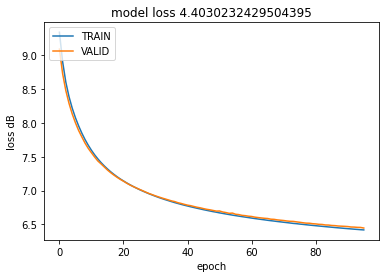

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_32
Epoch 1/100
   1/6174 [..............................] - ETA: 16:15 - loss: 119.9003

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 817us/step - loss: 41.3448 - val_loss: 17.5795
Epoch 2/100
6174/6174 [==============================] - 5s 770us/step - loss: 13.7953 - val_loss: 11.6040
Epoch 3/100
6174/6174 [==============================] - 4s 677us/step - loss: 10.5637 - val_loss: 9.6229
Epoch 4/100
6174/6174 [==============================] - 4s 662us/step - loss: 9.1044 - val_loss: 8.5213
Epoch 5/100
6174/6174 [==============================] - 4s 675us/step - loss: 8.2375 - val_loss: 7.8521
Epoch 6/100
6174/6174 [==============================] - 4s 676us/step - loss: 7.6794 - val_loss: 7.4025
Epoch 7/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.2783 - val_loss: 7.0663
Epoch 8/100
6174/6174 [==============================] - 4s 658us/step - loss: 6.9707 - val_loss: 6.8018
Epoch 9/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.7281 - val_loss: 6.5864
Epoch 10/100
6174/6174 [==============================] - 4s 6

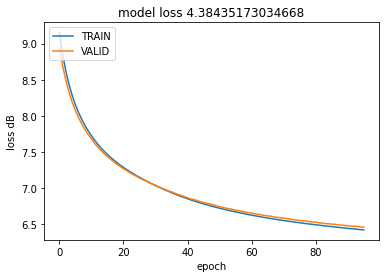

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_33
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 771us/step - loss: 52.4342 - val_loss: 18.2040
Epoch 2/100
6174/6174 [==============================] - 5s 819us/step - loss: 14.4161 - val_loss: 12.0167
Epoch 3/100
6174/6174 [==============================] - 4s 659us/step - loss: 10.7403 - val_loss: 9.6980
Epoch 4/100
6174/6174 [==============================] - 4s 663us/step - loss: 9.0473 - val_loss: 8.5168
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.1201 - val_loss: 7.8227
Epoch 6/100
6174/6174 [==============================] - 4s 678us/step - loss: 7.5373 - val_loss: 7.3439
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.1252 - val_loss: 7.0052
Epoch 8/100
6174/6174 [==============================] - 4s 671us/step - loss: 6.8236 - val_loss: 6.7459
Epoch 9/100
6174/6174 [==============================] - 4s 659us/step - loss: 6.5955 - val_loss: 6.5491
Epoch 10/100
6174/6174 [==============================] - 4s 6

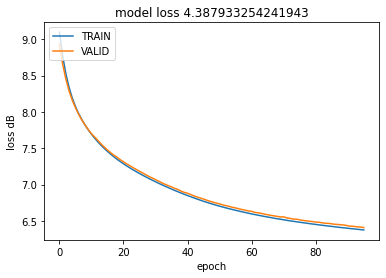

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_34
Epoch 1/100
   1/6174 [..............................] - ETA: 16:18 - loss: 116.3725

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 810us/step - loss: 42.7772 - val_loss: 20.1047
Epoch 2/100
6174/6174 [==============================] - 5s 815us/step - loss: 15.9984 - val_loss: 13.4160
Epoch 3/100
6174/6174 [==============================] - 4s 659us/step - loss: 11.9140 - val_loss: 10.8345
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 10.0221 - val_loss: 9.4024
Epoch 5/100
6174/6174 [==============================] - 4s 663us/step - loss: 8.8958 - val_loss: 8.4970
Epoch 6/100
6174/6174 [==============================] - 4s 667us/step - loss: 8.1412 - val_loss: 7.8678
Epoch 7/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.5982 - val_loss: 7.3938
Epoch 8/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.1981 - val_loss: 7.0462
Epoch 9/100
6174/6174 [==============================] - 4s 658us/step - loss: 6.8984 - val_loss: 6.7847
Epoch 10/100
6174/6174 [==============================] - 4s

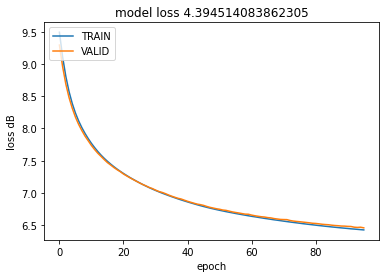

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_35
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 777us/step - loss: 62.3469 - val_loss: 22.9303
Epoch 2/100
6174/6174 [==============================] - 5s 873us/step - loss: 17.9941 - val_loss: 14.8924
Epoch 3/100
6174/6174 [==============================] - 4s 653us/step - loss: 13.0359 - val_loss: 11.5493
Epoch 4/100
6174/6174 [==============================] - 4s 664us/step - loss: 10.5339 - val_loss: 9.6792
Epoch 5/100
6174/6174 [==============================] - 4s 655us/step - loss: 9.1151 - val_loss: 8.5929
Epoch 6/100
6174/6174 [==============================] - 4s 678us/step - loss: 8.2472 - val_loss: 7.8919
Epoch 7/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.6662 - val_loss: 7.4156
Epoch 8/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.2553 - val_loss: 7.0711
Epoch 9/100
6174/6174 [==============================] - 4s 672us/step - loss: 6.9507 - val_loss: 6.8171
Epoch 10/100
6174/6174 [==============================] - 4s

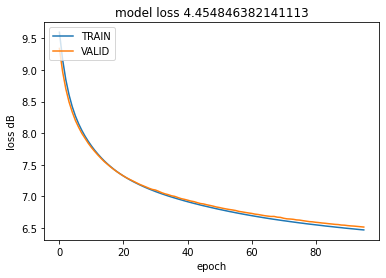

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_36
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 767us/step - loss: 61.8499 - val_loss: 26.0350
Epoch 2/100
6174/6174 [==============================] - 5s 836us/step - loss: 18.9248 - val_loss: 14.6910
Epoch 3/100
6174/6174 [==============================] - 4s 665us/step - loss: 12.8139 - val_loss: 11.1262
Epoch 4/100
6174/6174 [==============================] - 4s 662us/step - loss: 10.3243 - val_loss: 9.5245
Epoch 5/100
6174/6174 [==============================] - 4s 665us/step - loss: 9.0963 - val_loss: 8.6173
Epoch 6/100
6174/6174 [==============================] - 4s 667us/step - loss: 8.3292 - val_loss: 8.0053
Epoch 7/100
6174/6174 [==============================] - 4s 672us/step - loss: 7.7964 - val_loss: 7.5647
Epoch 8/100
6174/6174 [==============================] - 4s 659us/step - loss: 7.3937 - val_loss: 7.2121
Epoch 9/100
6174/6174 [==============================] - 4s 662us/step - loss: 7.0729 - val_loss: 6.9309
Epoch 10/100
6174/6174 [==============================] - 4s

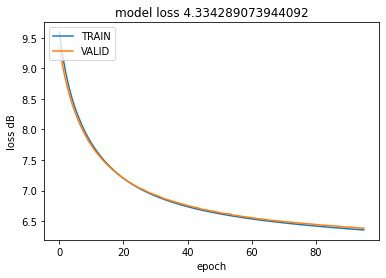

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_37
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 867us/step - loss: 63.1105 - val_loss: 20.1004
Epoch 2/100
6174/6174 [==============================] - 5s 733us/step - loss: 15.3950 - val_loss: 12.4586
Epoch 3/100
6174/6174 [==============================] - 4s 677us/step - loss: 11.1660 - val_loss: 10.1867
Epoch 4/100
6174/6174 [==============================] - 4s 667us/step - loss: 9.5167 - val_loss: 8.9409
Epoch 5/100
6174/6174 [==============================] - 4s 675us/step - loss: 8.5106 - val_loss: 8.1160
Epoch 6/100
6174/6174 [==============================] - 4s 679us/step - loss: 7.8102 - val_loss: 7.5267
Epoch 7/100
6174/6174 [==============================] - 4s 671us/step - loss: 7.3061 - val_loss: 7.1019
Epoch 8/100
6174/6174 [==============================] - 4s 678us/step - loss: 6.9409 - val_loss: 6.7995
Epoch 9/100
6174/6174 [==============================] - 4s 673us/step - loss: 6.6764 - val_loss: 6.5799
Epoch 10/100
6174/6174 [==============================] - 4s 

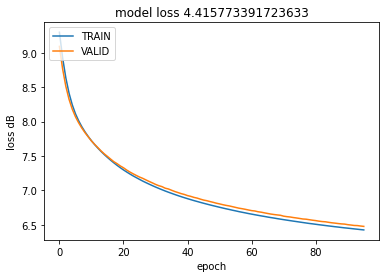

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_38
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 787us/step - loss: 29.9314 - val_loss: 15.8235
Epoch 2/100
6174/6174 [==============================] - 5s 811us/step - loss: 13.2060 - val_loss: 11.2713
Epoch 3/100
6174/6174 [==============================] - 4s 670us/step - loss: 10.3180 - val_loss: 9.4644
Epoch 4/100
6174/6174 [==============================] - 4s 653us/step - loss: 8.9603 - val_loss: 8.4803
Epoch 5/100
6174/6174 [==============================] - 4s 659us/step - loss: 8.1581 - val_loss: 7.8526
Epoch 6/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.6229 - val_loss: 7.4150
Epoch 7/100
6174/6174 [==============================] - 4s 662us/step - loss: 7.2406 - val_loss: 7.0924
Epoch 8/100
6174/6174 [==============================] - 4s 674us/step - loss: 6.9521 - val_loss: 6.8415
Epoch 9/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.7253 - val_loss: 6.6424
Epoch 10/100
6174/6174 [==============================] - 4s 6

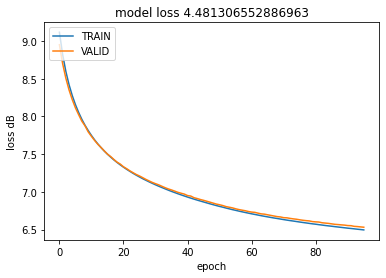

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_39
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 824us/step - loss: 24.3420 - val_loss: 16.6975
Epoch 2/100
6174/6174 [==============================] - 5s 764us/step - loss: 13.7940 - val_loss: 11.6733
Epoch 3/100
6174/6174 [==============================] - 4s 667us/step - loss: 10.6399 - val_loss: 9.6858
Epoch 4/100
6174/6174 [==============================] - 4s 671us/step - loss: 9.1282 - val_loss: 8.6182
Epoch 5/100
6174/6174 [==============================] - 4s 664us/step - loss: 8.2507 - val_loss: 7.9369
Epoch 6/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.6738 - val_loss: 7.4688
Epoch 7/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.2631 - val_loss: 7.1139
Epoch 8/100
6174/6174 [==============================] - 4s 654us/step - loss: 6.9490 - val_loss: 6.8402
Epoch 9/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.6983 - val_loss: 6.6143
Epoch 10/100
6174/6174 [==============================] - 4s 6

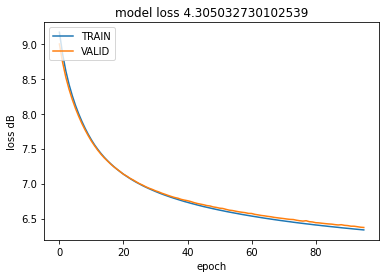

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_40
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 855us/step - loss: 28.2809 - val_loss: 19.2094
Epoch 2/100
6174/6174 [==============================] - 4s 718us/step - loss: 15.5418 - val_loss: 12.6491
Epoch 3/100
6174/6174 [==============================] - 4s 653us/step - loss: 11.2367 - val_loss: 9.9378
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.3022 - val_loss: 8.5948
Epoch 5/100
6174/6174 [==============================] - 4s 664us/step - loss: 8.2517 - val_loss: 7.8490
Epoch 6/100
6174/6174 [==============================] - 4s 682us/step - loss: 7.6228 - val_loss: 7.3649
Epoch 7/100
6174/6174 [==============================] - 4s 655us/step - loss: 7.1965 - val_loss: 7.0271
Epoch 8/100
6174/6174 [==============================] - 4s 680us/step - loss: 6.8834 - val_loss: 6.7630
Epoch 9/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.6341 - val_loss: 6.5434
Epoch 10/100
6174/6174 [==============================] - 4s 6

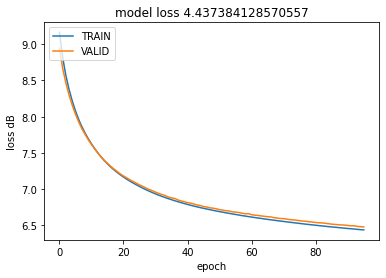

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_41
Epoch 1/100
   1/6174 [..............................] - ETA: 15:52 - loss: 187.2623

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 775us/step - loss: 75.8307 - val_loss: 25.3638
Epoch 2/100
6174/6174 [==============================] - 5s 742us/step - loss: 16.9975 - val_loss: 12.8706
Epoch 3/100
6174/6174 [==============================] - 5s 751us/step - loss: 11.4124 - val_loss: 10.2618
Epoch 4/100
6174/6174 [==============================] - 4s 667us/step - loss: 9.5475 - val_loss: 8.9534
Epoch 5/100
6174/6174 [==============================] - 4s 653us/step - loss: 8.4983 - val_loss: 8.1131
Epoch 6/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.7874 - val_loss: 7.5069
Epoch 7/100
6174/6174 [==============================] - 4s 665us/step - loss: 7.2644 - val_loss: 7.0483
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 6.8702 - val_loss: 6.6994
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.5664 - val_loss: 6.4211
Epoch 10/100
6174/6174 [==============================] - 4s 

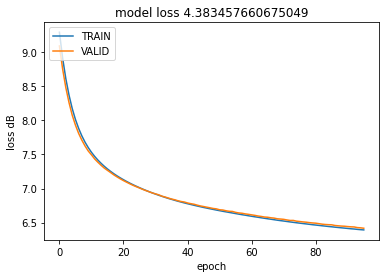

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_42
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 800us/step - loss: 30.9444 - val_loss: 15.5320
Epoch 2/100
6174/6174 [==============================] - 5s 790us/step - loss: 12.8212 - val_loss: 10.6054
Epoch 3/100
6174/6174 [==============================] - 4s 664us/step - loss: 9.5344 - val_loss: 8.5980
Epoch 4/100
6174/6174 [==============================] - 4s 666us/step - loss: 8.1170 - val_loss: 7.6839
Epoch 5/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.4225 - val_loss: 7.1782
Epoch 6/100
6174/6174 [==============================] - 4s 681us/step - loss: 6.9894 - val_loss: 6.8153
Epoch 7/100
6174/6174 [==============================] - 4s 659us/step - loss: 6.6735 - val_loss: 6.5420
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 6.4285 - val_loss: 6.3274
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.2309 - val_loss: 6.1484
Epoch 10/100
6174/6174 [==============================] - 4s 65

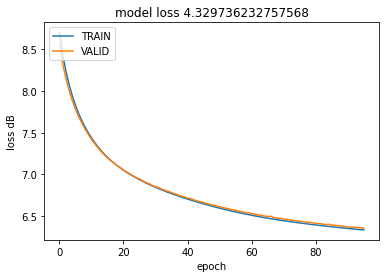

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_43
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 815us/step - loss: 130.1329 - val_loss: 33.6141
Epoch 2/100
6174/6174 [==============================] - 5s 778us/step - loss: 22.4964 - val_loss: 15.7847
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 12.9050 - val_loss: 10.9130
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 10.0029 - val_loss: 9.2447
Epoch 5/100
6174/6174 [==============================] - 4s 663us/step - loss: 8.7567 - val_loss: 8.3491
Epoch 6/100
6174/6174 [==============================] - 4s 680us/step - loss: 8.0129 - val_loss: 7.7463
Epoch 7/100
6174/6174 [==============================] - 4s 662us/step - loss: 7.4936 - val_loss: 7.3056
Epoch 8/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.1089 - val_loss: 6.9753
Epoch 9/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.8203 - val_loss: 6.7233
Epoch 10/100
6174/6174 [==============================] - 4

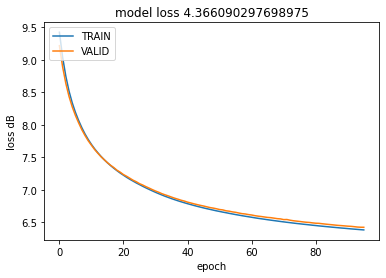

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_44
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 760us/step - loss: 31.4249 - val_loss: 17.8912
Epoch 2/100
6174/6174 [==============================] - 6s 897us/step - loss: 14.5596 - val_loss: 12.2741
Epoch 3/100
6174/6174 [==============================] - 4s 661us/step - loss: 11.1543 - val_loss: 10.1072
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.5087 - val_loss: 8.9111
Epoch 5/100
6174/6174 [==============================] - 4s 669us/step - loss: 8.5499 - val_loss: 8.1720
Epoch 6/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.9286 - val_loss: 7.6702
Epoch 7/100
6174/6174 [==============================] - 4s 659us/step - loss: 7.4894 - val_loss: 7.3021
Epoch 8/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.1547 - val_loss: 7.0134
Epoch 9/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.8845 - val_loss: 6.7701
Epoch 10/100
6174/6174 [==============================] - 4s 

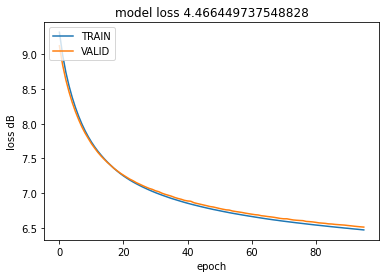

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_45
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 801us/step - loss: 41.2803 - val_loss: 18.7730
Epoch 2/100
6174/6174 [==============================] - 5s 790us/step - loss: 15.6581 - val_loss: 13.3287
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 11.9055 - val_loss: 10.7319
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.8622 - val_loss: 9.1723
Epoch 5/100
6174/6174 [==============================] - 4s 665us/step - loss: 8.6306 - val_loss: 8.2315
Epoch 6/100
6174/6174 [==============================] - 4s 699us/step - loss: 7.8822 - val_loss: 7.6136
Epoch 7/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.3727 - val_loss: 7.1724
Epoch 8/100
6174/6174 [==============================] - 4s 659us/step - loss: 6.9997 - val_loss: 6.8411
Epoch 9/100
6174/6174 [==============================] - 4s 677us/step - loss: 6.7138 - val_loss: 6.5828
Epoch 10/100
6174/6174 [==============================] - 4s 

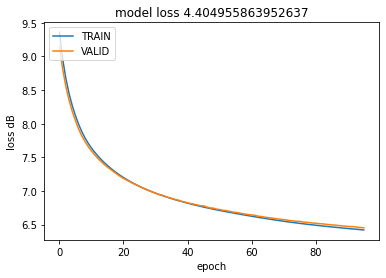

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_46
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 845us/step - loss: 39.1411 - val_loss: 20.1602
Epoch 2/100
6174/6174 [==============================] - 4s 727us/step - loss: 15.9115 - val_loss: 12.6886
Epoch 3/100
6174/6174 [==============================] - 4s 669us/step - loss: 11.3779 - val_loss: 10.1947
Epoch 4/100
6174/6174 [==============================] - 4s 664us/step - loss: 9.5755 - val_loss: 8.9717
Epoch 5/100
6174/6174 [==============================] - 4s 676us/step - loss: 8.5725 - val_loss: 8.2097
Epoch 6/100
6174/6174 [==============================] - 4s 686us/step - loss: 7.9233 - val_loss: 7.6825
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.4575 - val_loss: 7.2865
Epoch 8/100
6174/6174 [==============================] - 4s 671us/step - loss: 7.1005 - val_loss: 6.9729
Epoch 9/100
6174/6174 [==============================] - 4s 669us/step - loss: 6.8174 - val_loss: 6.7198
Epoch 10/100
6174/6174 [==============================] - 4s 

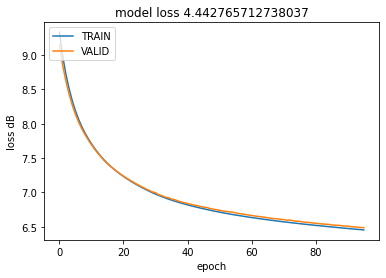

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_47
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 789us/step - loss: 26.7830 - val_loss: 15.9473
Epoch 2/100
6174/6174 [==============================] - 5s 822us/step - loss: 13.6548 - val_loss: 11.8555
Epoch 3/100
6174/6174 [==============================] - 4s 664us/step - loss: 10.8083 - val_loss: 9.9304
Epoch 4/100
6174/6174 [==============================] - 4s 694us/step - loss: 9.3327 - val_loss: 8.7782
Epoch 5/100
6174/6174 [==============================] - 5s 808us/step - loss: 8.3825 - val_loss: 8.0008
Epoch 6/100
6174/6174 [==============================] - 5s 761us/step - loss: 7.7286 - val_loss: 7.4484
Epoch 7/100
6174/6174 [==============================] - 4s 662us/step - loss: 7.2570 - val_loss: 7.0471
Epoch 8/100
6174/6174 [==============================] - 4s 687us/step - loss: 6.8978 - val_loss: 6.7362
Epoch 9/100
6174/6174 [==============================] - 4s 688us/step - loss: 6.6169 - val_loss: 6.4918
Epoch 10/100
6174/6174 [==============================] - 4s 6

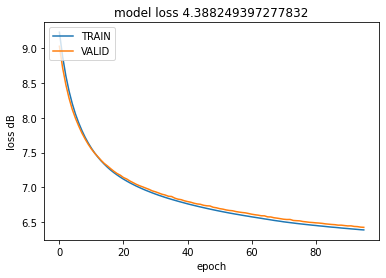

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_48
Epoch 1/100
   1/6174 [..............................] - ETA: 16:45 - loss: 73.2711

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 789us/step - loss: 36.7953 - val_loss: 21.0566
Epoch 2/100
6174/6174 [==============================] - 5s 797us/step - loss: 16.4390 - val_loss: 13.0954
Epoch 3/100
6174/6174 [==============================] - 4s 673us/step - loss: 11.4100 - val_loss: 10.0306
Epoch 4/100
6174/6174 [==============================] - 4s 657us/step - loss: 9.2596 - val_loss: 8.5552
Epoch 5/100
6174/6174 [==============================] - 4s 659us/step - loss: 8.1368 - val_loss: 7.7070
Epoch 6/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.4413 - val_loss: 7.1414
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 6.9704 - val_loss: 6.7636
Epoch 8/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.6394 - val_loss: 6.4903
Epoch 9/100
6174/6174 [==============================] - 4s 672us/step - loss: 6.3886 - val_loss: 6.2785
Epoch 10/100
6174/6174 [==============================] - 4s 

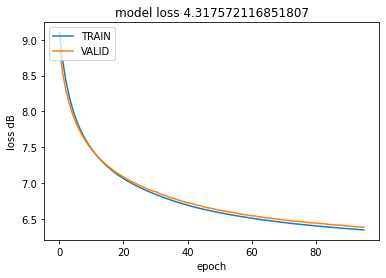

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_49
Epoch 1/100
   1/6174 [..............................] - ETA: 16:10 - loss: 74.7809

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 774us/step - loss: 31.3002 - val_loss: 16.3673
Epoch 2/100
6174/6174 [==============================] - 5s 828us/step - loss: 13.3864 - val_loss: 11.3419
Epoch 3/100
6174/6174 [==============================] - 4s 665us/step - loss: 10.3655 - val_loss: 9.5949
Epoch 4/100
6174/6174 [==============================] - 4s 662us/step - loss: 9.1072 - val_loss: 8.6900
Epoch 5/100
6174/6174 [==============================] - 4s 674us/step - loss: 8.3685 - val_loss: 8.0859
Epoch 6/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.8509 - val_loss: 7.6465
Epoch 7/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.4731 - val_loss: 7.3209
Epoch 8/100
6174/6174 [==============================] - 4s 672us/step - loss: 7.1866 - val_loss: 7.0674
Epoch 9/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.9561 - val_loss: 6.8533
Epoch 10/100
6174/6174 [==============================] - 4s 6

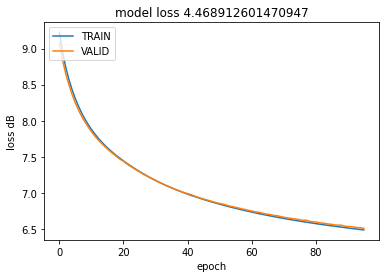

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_50
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 772us/step - loss: 43.5816 - val_loss: 21.4761
Epoch 2/100
6174/6174 [==============================] - 5s 758us/step - loss: 16.5301 - val_loss: 12.7459
Epoch 3/100
6174/6174 [==============================] - 4s 715us/step - loss: 11.2720 - val_loss: 9.9764
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.3502 - val_loss: 8.7431
Epoch 5/100
6174/6174 [==============================] - 4s 661us/step - loss: 8.3792 - val_loss: 8.0432
Epoch 6/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.7860 - val_loss: 7.5739
Epoch 7/100
6174/6174 [==============================] - 4s 659us/step - loss: 7.3665 - val_loss: 7.2187
Epoch 8/100
6174/6174 [==============================] - 4s 654us/step - loss: 7.0406 - val_loss: 6.9320
Epoch 9/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.7755 - val_loss: 6.6890
Epoch 10/100
6174/6174 [==============================] - 4s 6

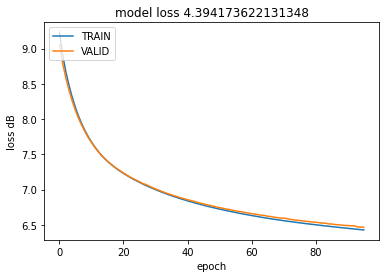

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_51
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 776us/step - loss: 44.1086 - val_loss: 18.7885
Epoch 2/100
6174/6174 [==============================] - 5s 834us/step - loss: 13.9432 - val_loss: 11.1183
Epoch 3/100
6174/6174 [==============================] - 4s 687us/step - loss: 9.9976 - val_loss: 9.0238
Epoch 4/100
6174/6174 [==============================] - 4s 656us/step - loss: 8.5579 - val_loss: 8.0569
Epoch 5/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.7895 - val_loss: 7.4731
Epoch 6/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.3056 - val_loss: 7.0844
Epoch 7/100
6174/6174 [==============================] - 4s 678us/step - loss: 6.9661 - val_loss: 6.7991
Epoch 8/100
6174/6174 [==============================] - 4s 680us/step - loss: 6.7079 - val_loss: 6.5727
Epoch 9/100
6174/6174 [==============================] - 4s 672us/step - loss: 6.5020 - val_loss: 6.3929
Epoch 10/100
6174/6174 [==============================] - 4s 66

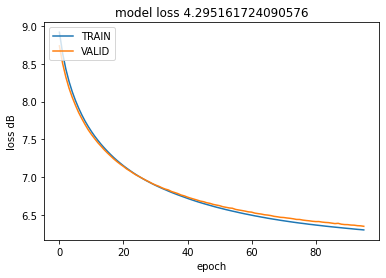

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_52
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 793us/step - loss: 31.6495 - val_loss: 16.5511
Epoch 2/100
6174/6174 [==============================] - 5s 791us/step - loss: 13.6957 - val_loss: 11.8011
Epoch 3/100
6174/6174 [==============================] - 4s 661us/step - loss: 10.7894 - val_loss: 9.9543
Epoch 4/100
6174/6174 [==============================] - 4s 675us/step - loss: 9.4049 - val_loss: 8.9150
Epoch 5/100
6174/6174 [==============================] - 4s 664us/step - loss: 8.5567 - val_loss: 8.2402
Epoch 6/100
6174/6174 [==============================] - 4s 681us/step - loss: 7.9917 - val_loss: 7.7769
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.5872 - val_loss: 7.4293
Epoch 8/100
6174/6174 [==============================] - 4s 698us/step - loss: 7.2728 - val_loss: 7.1458
Epoch 9/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.0132 - val_loss: 6.9121
Epoch 10/100
6174/6174 [==============================] - 4s 6

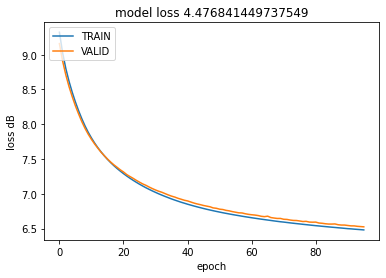

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_53
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 780us/step - loss: 49.7162 - val_loss: 18.8724
Epoch 2/100
6174/6174 [==============================] - 5s 824us/step - loss: 14.5087 - val_loss: 11.6641
Epoch 3/100
6174/6174 [==============================] - 4s 667us/step - loss: 10.5045 - val_loss: 9.4547
Epoch 4/100
6174/6174 [==============================] - 4s 664us/step - loss: 8.9149 - val_loss: 8.3209
Epoch 5/100
6174/6174 [==============================] - 4s 657us/step - loss: 8.0184 - val_loss: 7.6316
Epoch 6/100
6174/6174 [==============================] - 4s 684us/step - loss: 7.4296 - val_loss: 7.1493
Epoch 7/100
6174/6174 [==============================] - 4s 671us/step - loss: 6.9940 - val_loss: 6.7872
Epoch 8/100
6174/6174 [==============================] - 4s 682us/step - loss: 6.6679 - val_loss: 6.5195
Epoch 9/100
6174/6174 [==============================] - 4s 669us/step - loss: 6.4210 - val_loss: 6.3142
Epoch 10/100
6174/6174 [==============================] - 4s 6

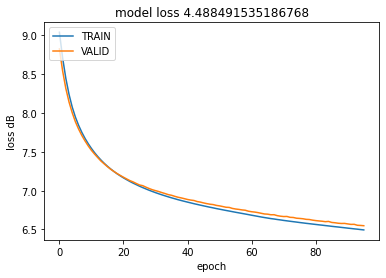

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_54
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 921us/step - loss: 24.1804 - val_loss: 14.3363
Epoch 2/100
6174/6174 [==============================] - 5s 732us/step - loss: 12.5364 - val_loss: 10.8673
Epoch 3/100
6174/6174 [==============================] - 4s 668us/step - loss: 10.1058 - val_loss: 9.2207
Epoch 4/100
6174/6174 [==============================] - 4s 666us/step - loss: 8.8224 - val_loss: 8.2689
Epoch 5/100
6174/6174 [==============================] - 4s 670us/step - loss: 8.0286 - val_loss: 7.6380
Epoch 6/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.4811 - val_loss: 7.1951
Epoch 7/100
6174/6174 [==============================] - 4s 665us/step - loss: 7.0833 - val_loss: 6.8661
Epoch 8/100
6174/6174 [==============================] - 4s 671us/step - loss: 6.7851 - val_loss: 6.6180
Epoch 9/100
6174/6174 [==============================] - 4s 677us/step - loss: 6.5516 - val_loss: 6.4225
Epoch 10/100
6174/6174 [==============================] - 4s 6

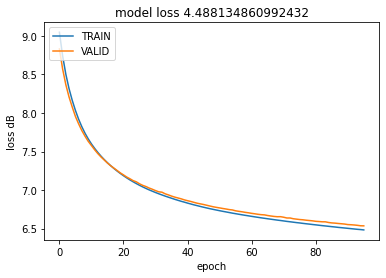

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_55
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 823us/step - loss: 48.0831 - val_loss: 20.2260
Epoch 2/100
6174/6174 [==============================] - 5s 740us/step - loss: 17.5704 - val_loss: 15.1210
Epoch 3/100
6174/6174 [==============================] - 4s 657us/step - loss: 13.7401 - val_loss: 12.3003
Epoch 4/100
6174/6174 [==============================] - 4s 650us/step - loss: 11.4026 - val_loss: 10.4740
Epoch 5/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.8861 - val_loss: 9.2530
Epoch 6/100
6174/6174 [==============================] - 4s 672us/step - loss: 8.8337 - val_loss: 8.3723
Epoch 7/100
6174/6174 [==============================] - 4s 663us/step - loss: 8.0658 - val_loss: 7.7340
Epoch 8/100
6174/6174 [==============================] - 4s 690us/step - loss: 7.5233 - val_loss: 7.2871
Epoch 9/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.1311 - val_loss: 6.9545
Epoch 10/100
6174/6174 [==============================] - 4

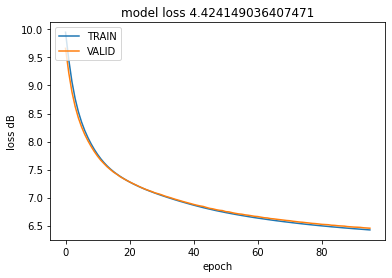

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_56
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 808us/step - loss: 52.3159 - val_loss: 24.2819
Epoch 2/100
6174/6174 [==============================] - 5s 766us/step - loss: 19.0561 - val_loss: 15.4018
Epoch 3/100
6174/6174 [==============================] - 4s 669us/step - loss: 13.2713 - val_loss: 11.6406
Epoch 4/100
6174/6174 [==============================] - 4s 677us/step - loss: 10.4944 - val_loss: 9.5864
Epoch 5/100
6174/6174 [==============================] - 4s 658us/step - loss: 8.9331 - val_loss: 8.4305
Epoch 6/100
6174/6174 [==============================] - 4s 674us/step - loss: 8.0204 - val_loss: 7.7178
Epoch 7/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.4401 - val_loss: 7.2459
Epoch 8/100
6174/6174 [==============================] - 4s 682us/step - loss: 7.0445 - val_loss: 6.9126
Epoch 9/100
6174/6174 [==============================] - 4s 674us/step - loss: 6.7540 - val_loss: 6.6568
Epoch 10/100
6174/6174 [==============================] - 4s

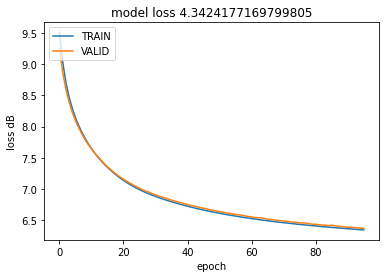

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_57
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 787us/step - loss: 36.8738 - val_loss: 18.2728
Epoch 2/100
6174/6174 [==============================] - 5s 840us/step - loss: 14.3478 - val_loss: 11.8335
Epoch 3/100
6174/6174 [==============================] - 4s 673us/step - loss: 10.6628 - val_loss: 9.6588
Epoch 4/100
6174/6174 [==============================] - 4s 660us/step - loss: 9.0672 - val_loss: 8.5164
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 8.1804 - val_loss: 7.8310
Epoch 6/100
6174/6174 [==============================] - 4s 678us/step - loss: 7.6040 - val_loss: 7.3521
Epoch 7/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.1887 - val_loss: 6.9937
Epoch 8/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.8690 - val_loss: 6.7060
Epoch 9/100
6174/6174 [==============================] - 4s 673us/step - loss: 6.6115 - val_loss: 6.4772
Epoch 10/100
6174/6174 [==============================] - 4s 6

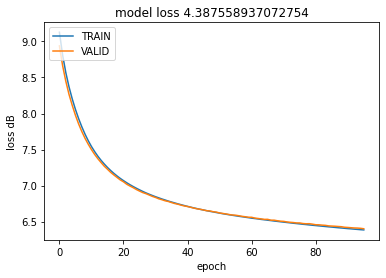

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_58
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 789us/step - loss: 42.4998 - val_loss: 17.8408
Epoch 2/100
6174/6174 [==============================] - 5s 838us/step - loss: 14.0979 - val_loss: 11.5326
Epoch 3/100
6174/6174 [==============================] - 4s 671us/step - loss: 10.3588 - val_loss: 9.3990
Epoch 4/100
6174/6174 [==============================] - 4s 676us/step - loss: 8.8534 - val_loss: 8.3295
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.9540 - val_loss: 7.5908
Epoch 6/100
6174/6174 [==============================] - 4s 682us/step - loss: 7.3269 - val_loss: 7.0868
Epoch 7/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.9003 - val_loss: 6.7414
Epoch 8/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.6067 - val_loss: 6.5001
Epoch 9/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.3950 - val_loss: 6.3192
Epoch 10/100
6174/6174 [==============================] - 4s 6

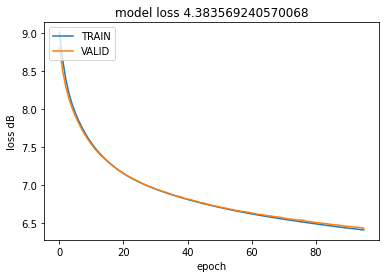

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_59
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 825us/step - loss: 44.7583 - val_loss: 21.4329
Epoch 2/100
6174/6174 [==============================] - 5s 768us/step - loss: 17.4782 - val_loss: 13.9230
Epoch 3/100
6174/6174 [==============================] - 4s 664us/step - loss: 12.1700 - val_loss: 10.6606
Epoch 4/100
6174/6174 [==============================] - 4s 677us/step - loss: 9.8758 - val_loss: 9.0932
Epoch 5/100
6174/6174 [==============================] - 4s 698us/step - loss: 8.6247 - val_loss: 8.1582
Epoch 6/100
6174/6174 [==============================] - 4s 684us/step - loss: 7.8694 - val_loss: 7.5686
Epoch 7/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.3624 - val_loss: 7.1422
Epoch 8/100
6174/6174 [==============================] - 4s 713us/step - loss: 6.9893 - val_loss: 6.8181
Epoch 9/100
6174/6174 [==============================] - 5s 751us/step - loss: 6.7030 - val_loss: 6.5674
Epoch 10/100
6174/6174 [==============================] - 4s 

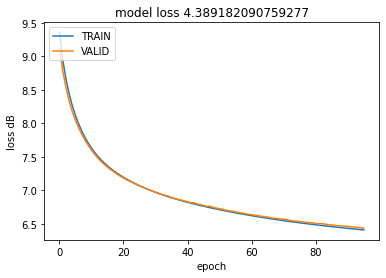

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_60
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 797us/step - loss: 71.2479 - val_loss: 25.4260
Epoch 2/100
6174/6174 [==============================] - 5s 820us/step - loss: 18.4009 - val_loss: 14.4401
Epoch 3/100
6174/6174 [==============================] - 4s 662us/step - loss: 12.8811 - val_loss: 11.4309
Epoch 4/100
6174/6174 [==============================] - 4s 656us/step - loss: 10.6016 - val_loss: 9.7838
Epoch 5/100
6174/6174 [==============================] - 4s 666us/step - loss: 9.2460 - val_loss: 8.7399
Epoch 6/100
6174/6174 [==============================] - 4s 686us/step - loss: 8.3690 - val_loss: 8.0231
Epoch 7/100
6174/6174 [==============================] - 4s 657us/step - loss: 7.7369 - val_loss: 7.4802
Epoch 8/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.2583 - val_loss: 7.0644
Epoch 9/100
6174/6174 [==============================] - 4s 671us/step - loss: 6.8977 - val_loss: 6.7457
Epoch 10/100
6174/6174 [==============================] - 4s

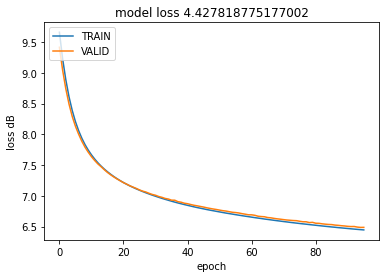

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_61
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 832us/step - loss: 25.2051 - val_loss: 13.0093
Epoch 2/100
6174/6174 [==============================] - 5s 752us/step - loss: 11.0886 - val_loss: 9.9967
Epoch 3/100
6174/6174 [==============================] - 4s 665us/step - loss: 9.3771 - val_loss: 8.9099
Epoch 4/100
6174/6174 [==============================] - 4s 655us/step - loss: 8.5212 - val_loss: 8.2117
Epoch 5/100
6174/6174 [==============================] - 4s 665us/step - loss: 7.9268 - val_loss: 7.6932
Epoch 6/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.4686 - val_loss: 7.2852
Epoch 7/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.0965 - val_loss: 6.9552
Epoch 8/100
6174/6174 [==============================] - 4s 669us/step - loss: 6.7981 - val_loss: 6.6866
Epoch 9/100
6174/6174 [==============================] - 4s 661us/step - loss: 6.5609 - val_loss: 6.4722
Epoch 10/100
6174/6174 [==============================] - 4s 661

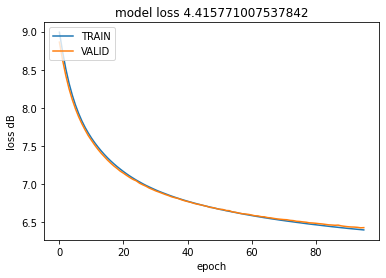

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_62
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 909us/step - loss: 25.8748 - val_loss: 16.7361
Epoch 2/100
6174/6174 [==============================] - 4s 684us/step - loss: 13.6064 - val_loss: 11.2092
Epoch 3/100
6174/6174 [==============================] - 4s 662us/step - loss: 10.0355 - val_loss: 9.0533
Epoch 4/100
6174/6174 [==============================] - 4s 667us/step - loss: 8.5886 - val_loss: 8.0630
Epoch 5/100
6174/6174 [==============================] - 4s 671us/step - loss: 7.8065 - val_loss: 7.4494
Epoch 6/100
6174/6174 [==============================] - 4s 685us/step - loss: 7.2790 - val_loss: 7.0095
Epoch 7/100
6174/6174 [==============================] - 4s 654us/step - loss: 6.8923 - val_loss: 6.6817
Epoch 8/100
6174/6174 [==============================] - 4s 677us/step - loss: 6.5985 - val_loss: 6.4312
Epoch 9/100
6174/6174 [==============================] - 4s 664us/step - loss: 6.3712 - val_loss: 6.2386
Epoch 10/100
6174/6174 [==============================] - 4s 6

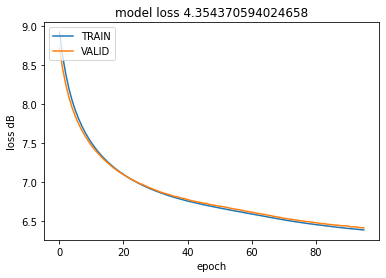

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_63
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 856us/step - loss: 25.3542 - val_loss: 16.5961
Epoch 2/100
6174/6174 [==============================] - 5s 754us/step - loss: 14.1480 - val_loss: 12.2670
Epoch 3/100
6174/6174 [==============================] - 4s 663us/step - loss: 11.1564 - val_loss: 10.2042
Epoch 4/100
6174/6174 [==============================] - 4s 667us/step - loss: 9.5803 - val_loss: 9.0390
Epoch 5/100
6174/6174 [==============================] - 4s 655us/step - loss: 8.6317 - val_loss: 8.2712
Epoch 6/100
6174/6174 [==============================] - 4s 692us/step - loss: 7.9734 - val_loss: 7.7205
Epoch 7/100
6174/6174 [==============================] - 4s 693us/step - loss: 7.4865 - val_loss: 7.2978
Epoch 8/100
6174/6174 [==============================] - 4s 683us/step - loss: 7.1113 - val_loss: 6.9683
Epoch 9/100
6174/6174 [==============================] - 4s 700us/step - loss: 6.8114 - val_loss: 6.7009
Epoch 10/100
6174/6174 [==============================] - 4s 

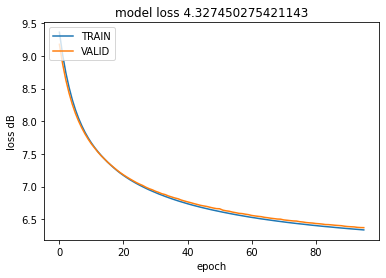

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_64
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 855us/step - loss: 44.6069 - val_loss: 21.6811
Epoch 2/100
6174/6174 [==============================] - 4s 726us/step - loss: 16.0520 - val_loss: 12.6102
Epoch 3/100
6174/6174 [==============================] - 4s 656us/step - loss: 11.2165 - val_loss: 10.1069
Epoch 4/100
6174/6174 [==============================] - 4s 670us/step - loss: 9.4292 - val_loss: 8.8391
Epoch 5/100
6174/6174 [==============================] - 4s 652us/step - loss: 8.4509 - val_loss: 8.0937
Epoch 6/100
6174/6174 [==============================] - 4s 677us/step - loss: 7.8255 - val_loss: 7.5735
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.3751 - val_loss: 7.1858
Epoch 8/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.0330 - val_loss: 6.8889
Epoch 9/100
6174/6174 [==============================] - 4s 661us/step - loss: 6.7653 - val_loss: 6.6545
Epoch 10/100
6174/6174 [==============================] - 4s 

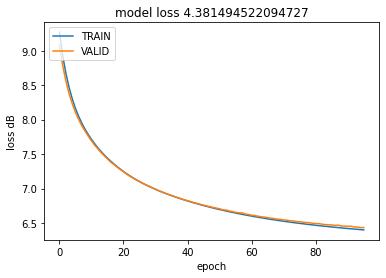

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_65
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 817us/step - loss: 64.9274 - val_loss: 22.7526
Epoch 2/100
6174/6174 [==============================] - 5s 777us/step - loss: 17.5878 - val_loss: 14.3229
Epoch 3/100
6174/6174 [==============================] - 4s 666us/step - loss: 12.5155 - val_loss: 11.0484
Epoch 4/100
6174/6174 [==============================] - 4s 659us/step - loss: 10.0771 - val_loss: 9.2497
Epoch 5/100
6174/6174 [==============================] - 4s 694us/step - loss: 8.6649 - val_loss: 8.1462
Epoch 6/100
6174/6174 [==============================] - 4s 682us/step - loss: 7.7782 - val_loss: 7.4457
Epoch 7/100
6174/6174 [==============================] - 4s 676us/step - loss: 7.2001 - val_loss: 6.9773
Epoch 8/100
6174/6174 [==============================] - 4s 728us/step - loss: 6.7992 - val_loss: 6.6376
Epoch 9/100
6174/6174 [==============================] - 4s 672us/step - loss: 6.5031 - val_loss: 6.3827
Epoch 10/100
6174/6174 [==============================] - 4s

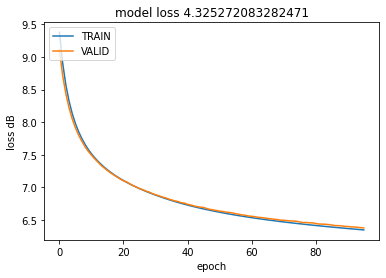

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_66
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 909us/step - loss: 42.6109 - val_loss: 21.0153
Epoch 2/100
6174/6174 [==============================] - 4s 667us/step - loss: 16.6056 - val_loss: 13.6096
Epoch 3/100
6174/6174 [==============================] - 4s 667us/step - loss: 12.2484 - val_loss: 10.9740
Epoch 4/100
6174/6174 [==============================] - 4s 668us/step - loss: 10.2725 - val_loss: 9.5397
Epoch 5/100
6174/6174 [==============================] - 4s 666us/step - loss: 9.1394 - val_loss: 8.6665
Epoch 6/100
6174/6174 [==============================] - 4s 671us/step - loss: 8.4109 - val_loss: 8.0840
Epoch 7/100
6174/6174 [==============================] - 4s 665us/step - loss: 7.9044 - val_loss: 7.6573
Epoch 8/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.5250 - val_loss: 7.3315
Epoch 9/100
6174/6174 [==============================] - 4s 672us/step - loss: 7.2285 - val_loss: 7.0797
Epoch 10/100
6174/6174 [==============================] - 4s

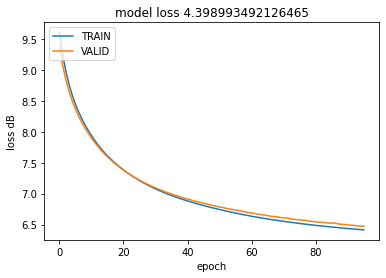

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_67
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 844us/step - loss: 52.8062 - val_loss: 21.0700
Epoch 2/100
6174/6174 [==============================] - 5s 785us/step - loss: 15.3256 - val_loss: 12.0378
Epoch 3/100
6174/6174 [==============================] - 4s 668us/step - loss: 10.7771 - val_loss: 9.7818
Epoch 4/100
6174/6174 [==============================] - 4s 670us/step - loss: 9.2269 - val_loss: 8.7162
Epoch 5/100
6174/6174 [==============================] - 4s 667us/step - loss: 8.3805 - val_loss: 8.0636
Epoch 6/100
6174/6174 [==============================] - 4s 685us/step - loss: 7.8273 - val_loss: 7.6119
Epoch 7/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.4324 - val_loss: 7.2783
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.1282 - val_loss: 7.0085
Epoch 9/100
6174/6174 [==============================] - 4s 670us/step - loss: 6.8821 - val_loss: 6.7864
Epoch 10/100
6174/6174 [==============================] - 4s 6

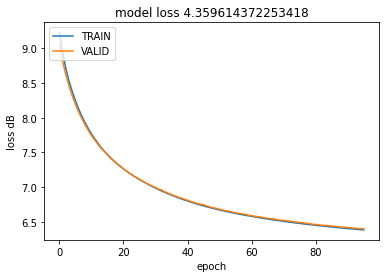

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_68
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 830us/step - loss: 42.6735 - val_loss: 22.3833
Epoch 2/100
6174/6174 [==============================] - 5s 741us/step - loss: 16.5961 - val_loss: 12.8951
Epoch 3/100
6174/6174 [==============================] - 4s 663us/step - loss: 11.2974 - val_loss: 10.1410
Epoch 4/100
6174/6174 [==============================] - 4s 674us/step - loss: 9.4193 - val_loss: 8.8614
Epoch 5/100
6174/6174 [==============================] - 4s 661us/step - loss: 8.4422 - val_loss: 8.1150
Epoch 6/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.8357 - val_loss: 7.6168
Epoch 7/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.4130 - val_loss: 7.2444
Epoch 8/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.0864 - val_loss: 6.9530
Epoch 9/100
6174/6174 [==============================] - 4s 656us/step - loss: 6.8228 - val_loss: 6.7135
Epoch 10/100
6174/6174 [==============================] - 4s 

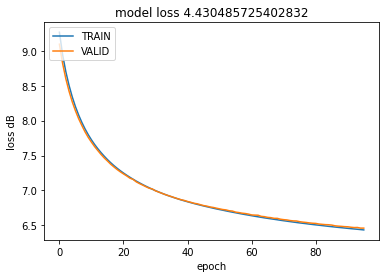

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_69
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 848us/step - loss: 39.4212 - val_loss: 18.5432
Epoch 2/100
6174/6174 [==============================] - 5s 751us/step - loss: 15.0404 - val_loss: 12.7808
Epoch 3/100
6174/6174 [==============================] - 4s 659us/step - loss: 11.5026 - val_loss: 10.5893
Epoch 4/100
6174/6174 [==============================] - 4s 665us/step - loss: 9.8633 - val_loss: 9.3393
Epoch 5/100
6174/6174 [==============================] - 4s 671us/step - loss: 8.8218 - val_loss: 8.4620
Epoch 6/100
6174/6174 [==============================] - 4s 709us/step - loss: 8.0561 - val_loss: 7.8087
Epoch 7/100
6174/6174 [==============================] - 4s 659us/step - loss: 7.4962 - val_loss: 7.3370
Epoch 8/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.0800 - val_loss: 6.9652
Epoch 9/100
6174/6174 [==============================] - 4s 670us/step - loss: 6.7501 - val_loss: 6.6710
Epoch 10/100
6174/6174 [==============================] - 4s 

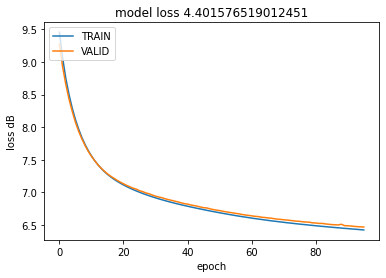

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_70
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 857us/step - loss: 55.8141 - val_loss: 34.5953
Epoch 2/100
6174/6174 [==============================] - 4s 714us/step - loss: 24.1155 - val_loss: 17.0106
Epoch 3/100
6174/6174 [==============================] - 4s 668us/step - loss: 14.0648 - val_loss: 11.8360
Epoch 4/100
6174/6174 [==============================] - 4s 662us/step - loss: 10.6332 - val_loss: 9.5950
Epoch 5/100
6174/6174 [==============================] - 4s 655us/step - loss: 8.9559 - val_loss: 8.3960
Epoch 6/100
6174/6174 [==============================] - 4s 673us/step - loss: 8.0113 - val_loss: 7.6629
Epoch 7/100
6174/6174 [==============================] - 4s 665us/step - loss: 7.4065 - val_loss: 7.1749
Epoch 8/100
6174/6174 [==============================] - 4s 665us/step - loss: 7.0002 - val_loss: 6.8432
Epoch 9/100
6174/6174 [==============================] - 4s 668us/step - loss: 6.7086 - val_loss: 6.5895
Epoch 10/100
6174/6174 [==============================] - 4s

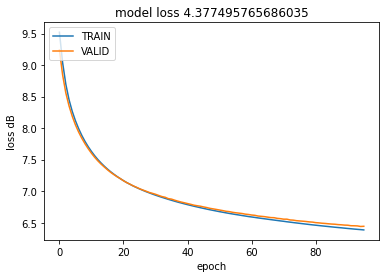

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_71
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 828us/step - loss: 46.0738 - val_loss: 18.3738
Epoch 2/100
6174/6174 [==============================] - 4s 720us/step - loss: 13.7529 - val_loss: 11.0398
Epoch 3/100
6174/6174 [==============================] - 4s 666us/step - loss: 10.0178 - val_loss: 9.1210
Epoch 4/100
6174/6174 [==============================] - 4s 674us/step - loss: 8.6231 - val_loss: 8.1409
Epoch 5/100
6174/6174 [==============================] - 4s 658us/step - loss: 7.8389 - val_loss: 7.5384
Epoch 6/100
6174/6174 [==============================] - 4s 682us/step - loss: 7.3253 - val_loss: 7.1239
Epoch 7/100
6174/6174 [==============================] - 4s 654us/step - loss: 6.9677 - val_loss: 6.8283
Epoch 8/100
6174/6174 [==============================] - 4s 694us/step - loss: 6.7047 - val_loss: 6.6037
Epoch 9/100
6174/6174 [==============================] - 4s 666us/step - loss: 6.4993 - val_loss: 6.4273
Epoch 10/100
6174/6174 [==============================] - 4s 6

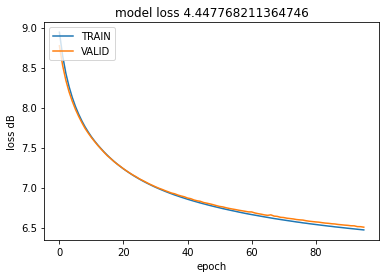

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_72
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 838us/step - loss: 41.8310 - val_loss: 19.7005
Epoch 2/100
6174/6174 [==============================] - 5s 730us/step - loss: 15.0637 - val_loss: 12.1088
Epoch 3/100
6174/6174 [==============================] - 4s 671us/step - loss: 10.8999 - val_loss: 9.8459
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.2404 - val_loss: 8.6701
Epoch 5/100
6174/6174 [==============================] - 4s 674us/step - loss: 8.3232 - val_loss: 7.9659
Epoch 6/100
6174/6174 [==============================] - 5s 730us/step - loss: 7.7317 - val_loss: 7.4857
Epoch 7/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.3091 - val_loss: 7.1308
Epoch 8/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.9902 - val_loss: 6.8528
Epoch 9/100
6174/6174 [==============================] - 4s 669us/step - loss: 6.7409 - val_loss: 6.6306
Epoch 10/100
6174/6174 [==============================] - 4s 6

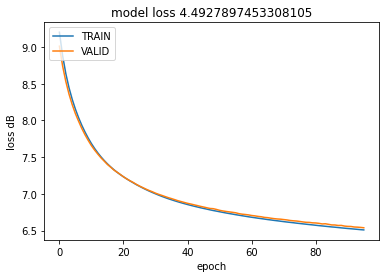

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_73
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 812us/step - loss: 95.8067 - val_loss: 27.8109
Epoch 2/100
6174/6174 [==============================] - 5s 748us/step - loss: 19.7760 - val_loss: 15.0287
Epoch 3/100
6174/6174 [==============================] - 4s 664us/step - loss: 12.9783 - val_loss: 11.2309
Epoch 4/100
6174/6174 [==============================] - 4s 677us/step - loss: 10.3717 - val_loss: 9.5148
Epoch 5/100
6174/6174 [==============================] - 4s 673us/step - loss: 9.0560 - val_loss: 8.5471
Epoch 6/100
6174/6174 [==============================] - 4s 682us/step - loss: 8.2408 - val_loss: 7.9004
Epoch 7/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.6770 - val_loss: 7.4414
Epoch 8/100
6174/6174 [==============================] - 4s 684us/step - loss: 7.2612 - val_loss: 7.0977
Epoch 9/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.9486 - val_loss: 6.8281
Epoch 10/100
6174/6174 [==============================] - 4s

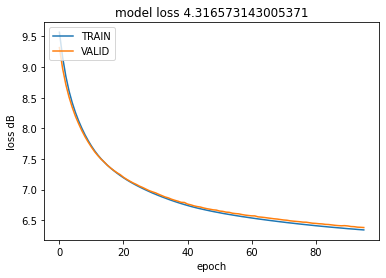

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_74
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 849us/step - loss: 31.5538 - val_loss: 19.1647
Epoch 2/100
6174/6174 [==============================] - 5s 730us/step - loss: 15.6075 - val_loss: 12.9257
Epoch 3/100
6174/6174 [==============================] - 4s 671us/step - loss: 11.7572 - val_loss: 10.5940
Epoch 4/100
6174/6174 [==============================] - 4s 656us/step - loss: 9.9638 - val_loss: 9.2648
Epoch 5/100
6174/6174 [==============================] - 4s 666us/step - loss: 8.9152 - val_loss: 8.4517
Epoch 6/100
6174/6174 [==============================] - 4s 683us/step - loss: 8.2444 - val_loss: 7.8963
Epoch 7/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.7588 - val_loss: 7.4794
Epoch 8/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.3917 - val_loss: 7.1677
Epoch 9/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.1048 - val_loss: 6.9189
Epoch 10/100
6174/6174 [==============================] - 4s 

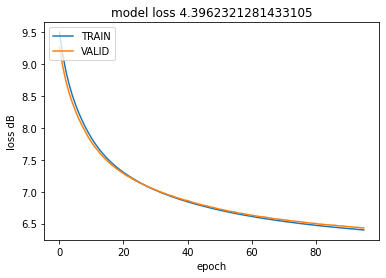

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_75
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 815us/step - loss: 104.8544 - val_loss: 29.2685
Epoch 2/100
6174/6174 [==============================] - 5s 818us/step - loss: 20.0902 - val_loss: 15.5157
Epoch 3/100
6174/6174 [==============================] - 4s 675us/step - loss: 13.6201 - val_loss: 12.0744
Epoch 4/100
6174/6174 [==============================] - 4s 668us/step - loss: 11.0259 - val_loss: 10.1988
Epoch 5/100
6174/6174 [==============================] - 4s 669us/step - loss: 9.5465 - val_loss: 9.0610
Epoch 6/100
6174/6174 [==============================] - 4s 668us/step - loss: 8.6083 - val_loss: 8.2740
Epoch 7/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.9521 - val_loss: 7.7167
Epoch 8/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.4822 - val_loss: 7.3092
Epoch 9/100
6174/6174 [==============================] - 4s 652us/step - loss: 7.1302 - val_loss: 7.0036
Epoch 10/100
6174/6174 [==============================] - 

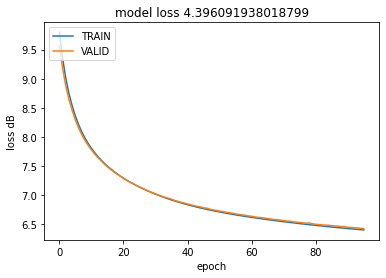

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_76
Epoch 1/100
   1/6174 [..............................] - ETA: 16:35 - loss: 81.6021

/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 883us/step - loss: 36.8100 - val_loss: 19.6630
Epoch 2/100
6174/6174 [==============================] - 4s 702us/step - loss: 15.5639 - val_loss: 12.6323
Epoch 3/100
6174/6174 [==============================] - 4s 664us/step - loss: 11.0332 - val_loss: 9.8946
Epoch 4/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.0895 - val_loss: 8.5059
Epoch 5/100
6174/6174 [==============================] - 4s 676us/step - loss: 8.0508 - val_loss: 7.7149
Epoch 6/100
6174/6174 [==============================] - 4s 687us/step - loss: 7.4349 - val_loss: 7.2091
Epoch 7/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.0252 - val_loss: 6.8656
Epoch 8/100
6174/6174 [==============================] - 4s 675us/step - loss: 6.7335 - val_loss: 6.6163
Epoch 9/100
6174/6174 [==============================] - 4s 659us/step - loss: 6.5123 - val_loss: 6.4185
Epoch 10/100
6174/6174 [==============================] - 4s 6

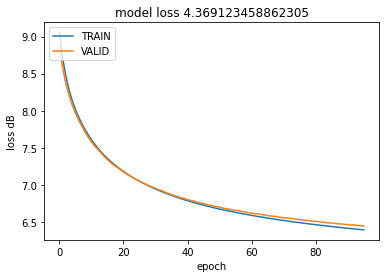

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_77
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 849us/step - loss: 43.6187 - val_loss: 25.2414
Epoch 2/100
6174/6174 [==============================] - 5s 779us/step - loss: 16.8306 - val_loss: 12.2058
Epoch 3/100
6174/6174 [==============================] - 4s 679us/step - loss: 10.6697 - val_loss: 9.3531
Epoch 4/100
6174/6174 [==============================] - 4s 656us/step - loss: 8.7434 - val_loss: 8.1491
Epoch 5/100
6174/6174 [==============================] - 4s 675us/step - loss: 7.8439 - val_loss: 7.4943
Epoch 6/100
6174/6174 [==============================] - 4s 675us/step - loss: 7.3055 - val_loss: 7.0588
Epoch 7/100
6174/6174 [==============================] - 4s 676us/step - loss: 6.9129 - val_loss: 6.7253
Epoch 8/100
6174/6174 [==============================] - 4s 673us/step - loss: 6.6051 - val_loss: 6.4653
Epoch 9/100
6174/6174 [==============================] - 4s 661us/step - loss: 6.3599 - val_loss: 6.2566
Epoch 10/100
6174/6174 [==============================] - 4s 6

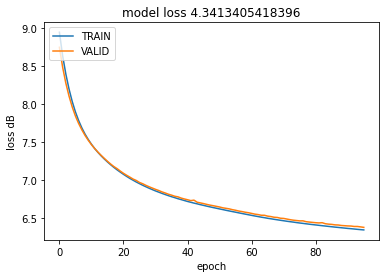

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_78
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 865us/step - loss: 54.7011 - val_loss: 24.5835
Epoch 2/100
6174/6174 [==============================] - 5s 733us/step - loss: 16.9464 - val_loss: 13.1888
Epoch 3/100
6174/6174 [==============================] - 4s 669us/step - loss: 11.5831 - val_loss: 10.4626
Epoch 4/100
6174/6174 [==============================] - 4s 658us/step - loss: 9.6954 - val_loss: 9.0909
Epoch 5/100
6174/6174 [==============================] - 4s 670us/step - loss: 8.6486 - val_loss: 8.2607
Epoch 6/100
6174/6174 [==============================] - 4s 687us/step - loss: 7.9678 - val_loss: 7.6797
Epoch 7/100
6174/6174 [==============================] - 4s 655us/step - loss: 7.4841 - val_loss: 7.2597
Epoch 8/100
6174/6174 [==============================] - 4s 669us/step - loss: 7.1172 - val_loss: 6.9332
Epoch 9/100
6174/6174 [==============================] - 4s 665us/step - loss: 6.8232 - val_loss: 6.6670
Epoch 10/100
6174/6174 [==============================] - 4s 

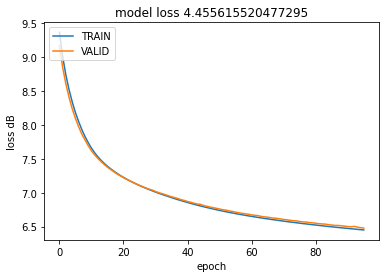

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_79
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 864us/step - loss: 30.5426 - val_loss: 16.4943
Epoch 2/100
6174/6174 [==============================] - 4s 713us/step - loss: 13.6717 - val_loss: 11.7625
Epoch 3/100
6174/6174 [==============================] - 4s 666us/step - loss: 10.7559 - val_loss: 9.9024
Epoch 4/100
6174/6174 [==============================] - 4s 671us/step - loss: 9.3588 - val_loss: 8.8122
Epoch 5/100
6174/6174 [==============================] - 4s 674us/step - loss: 8.4557 - val_loss: 8.0422
Epoch 6/100
6174/6174 [==============================] - 4s 685us/step - loss: 7.8126 - val_loss: 7.4971
Epoch 7/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.3458 - val_loss: 7.1029
Epoch 8/100
6174/6174 [==============================] - 4s 671us/step - loss: 6.9982 - val_loss: 6.8053
Epoch 9/100
6174/6174 [==============================] - 4s 675us/step - loss: 6.7310 - val_loss: 6.5781
Epoch 10/100
6174/6174 [==============================] - 4s 6

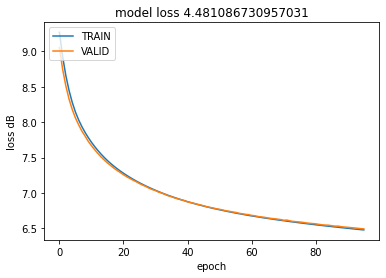

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_80
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 972us/step - loss: 109.7087 - val_loss: 24.2631
Epoch 2/100
6174/6174 [==============================] - 4s 678us/step - loss: 18.0476 - val_loss: 13.8195
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 12.1473 - val_loss: 10.7878
Epoch 4/100
6174/6174 [==============================] - 4s 674us/step - loss: 10.0292 - val_loss: 9.3153
Epoch 5/100
6174/6174 [==============================] - 4s 668us/step - loss: 8.9045 - val_loss: 8.4568
Epoch 6/100
6174/6174 [==============================] - 4s 681us/step - loss: 8.1915 - val_loss: 7.8725
Epoch 7/100
6174/6174 [==============================] - 4s 680us/step - loss: 7.6974 - val_loss: 7.4549
Epoch 8/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.3270 - val_loss: 7.1291
Epoch 9/100
6174/6174 [==============================] - 4s 654us/step - loss: 7.0308 - val_loss: 6.8659
Epoch 10/100
6174/6174 [==============================] - 4

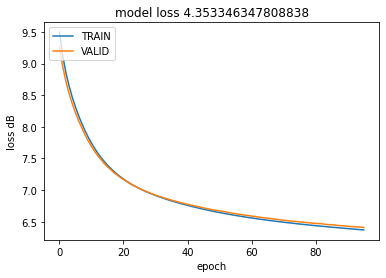

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_81
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 912us/step - loss: 26.6349 - val_loss: 16.1271
Epoch 2/100
6174/6174 [==============================] - 4s 663us/step - loss: 12.7526 - val_loss: 10.7295
Epoch 3/100
6174/6174 [==============================] - 4s 661us/step - loss: 9.6869 - val_loss: 8.9477
Epoch 4/100
6174/6174 [==============================] - 4s 670us/step - loss: 8.3837 - val_loss: 7.9941
Epoch 5/100
6174/6174 [==============================] - 4s 675us/step - loss: 7.6271 - val_loss: 7.3889
Epoch 6/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.1274 - val_loss: 6.9694
Epoch 7/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.7785 - val_loss: 6.6702
Epoch 8/100
6174/6174 [==============================] - 4s 669us/step - loss: 6.5216 - val_loss: 6.4445
Epoch 9/100
6174/6174 [==============================] - 4s 670us/step - loss: 6.3247 - val_loss: 6.2664
Epoch 10/100
6174/6174 [==============================] - 4s 66

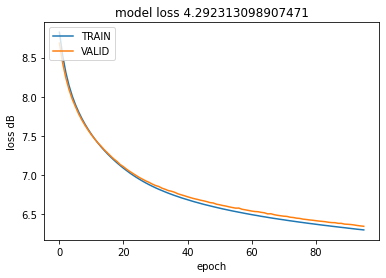

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_82
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 834us/step - loss: 60.1614 - val_loss: 24.1624
Epoch 2/100
6174/6174 [==============================] - 5s 739us/step - loss: 18.4900 - val_loss: 14.7300
Epoch 3/100
6174/6174 [==============================] - 4s 662us/step - loss: 12.7544 - val_loss: 11.1365
Epoch 4/100
6174/6174 [==============================] - 4s 667us/step - loss: 10.1568 - val_loss: 9.3414
Epoch 5/100
6174/6174 [==============================] - 4s 655us/step - loss: 8.7898 - val_loss: 8.3129
Epoch 6/100
6174/6174 [==============================] - 4s 694us/step - loss: 7.9766 - val_loss: 7.6694
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.4434 - val_loss: 7.2229
Epoch 8/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.0610 - val_loss: 6.9008
Epoch 9/100
6174/6174 [==============================] - 4s 655us/step - loss: 6.7698 - val_loss: 6.6434
Epoch 10/100
6174/6174 [==============================] - 4s

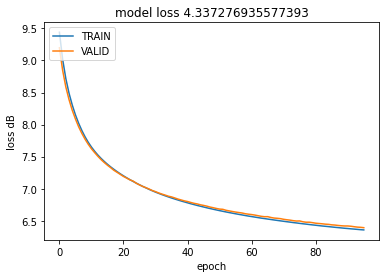

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_83
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 879us/step - loss: 100.5304 - val_loss: 31.9069
Epoch 2/100
6174/6174 [==============================] - 4s 665us/step - loss: 18.8581 - val_loss: 13.2296
Epoch 3/100
6174/6174 [==============================] - 4s 670us/step - loss: 11.4461 - val_loss: 10.1463
Epoch 4/100
6174/6174 [==============================] - 4s 672us/step - loss: 9.3284 - val_loss: 8.6648
Epoch 5/100
6174/6174 [==============================] - 4s 672us/step - loss: 8.2181 - val_loss: 7.8483
Epoch 6/100
6174/6174 [==============================] - 4s 679us/step - loss: 7.5733 - val_loss: 7.3429
Epoch 7/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.1550 - val_loss: 7.0022
Epoch 8/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.8569 - val_loss: 6.7611
Epoch 9/100
6174/6174 [==============================] - 4s 673us/step - loss: 6.6279 - val_loss: 6.5470
Epoch 10/100
6174/6174 [==============================] - 4s

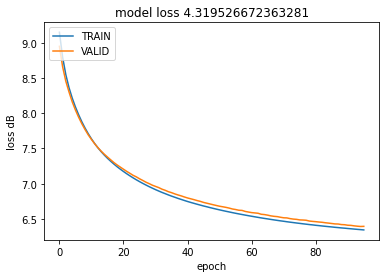

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_84
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 858us/step - loss: 54.6033 - val_loss: 28.4886
Epoch 2/100
6174/6174 [==============================] - 5s 767us/step - loss: 20.4409 - val_loss: 14.7382
Epoch 3/100
6174/6174 [==============================] - 4s 667us/step - loss: 12.4724 - val_loss: 10.9430
Epoch 4/100
6174/6174 [==============================] - 4s 662us/step - loss: 10.0542 - val_loss: 9.4038
Epoch 5/100
6174/6174 [==============================] - 4s 671us/step - loss: 8.9072 - val_loss: 8.5506
Epoch 6/100
6174/6174 [==============================] - 4s 684us/step - loss: 8.2164 - val_loss: 7.9678
Epoch 7/100
6174/6174 [==============================] - 4s 664us/step - loss: 7.7262 - val_loss: 7.5378
Epoch 8/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.3512 - val_loss: 7.2032
Epoch 9/100
6174/6174 [==============================] - 4s 670us/step - loss: 7.0532 - val_loss: 6.9355
Epoch 10/100
6174/6174 [==============================] - 4s

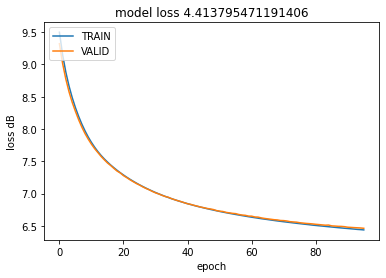

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_85
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 847us/step - loss: 29.8023 - val_loss: 16.5703
Epoch 2/100
6174/6174 [==============================] - 5s 739us/step - loss: 13.6783 - val_loss: 11.6819
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 10.4595 - val_loss: 9.5061
Epoch 4/100
6174/6174 [==============================] - 4s 668us/step - loss: 8.9117 - val_loss: 8.3882
Epoch 5/100
6174/6174 [==============================] - 4s 662us/step - loss: 8.0636 - val_loss: 7.7280
Epoch 6/100
6174/6174 [==============================] - 4s 675us/step - loss: 7.5314 - val_loss: 7.2780
Epoch 7/100
6174/6174 [==============================] - 4s 656us/step - loss: 7.1494 - val_loss: 6.9455
Epoch 8/100
6174/6174 [==============================] - 4s 678us/step - loss: 6.8552 - val_loss: 6.6844
Epoch 9/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.6195 - val_loss: 6.4711
Epoch 10/100
6174/6174 [==============================] - 4s 6

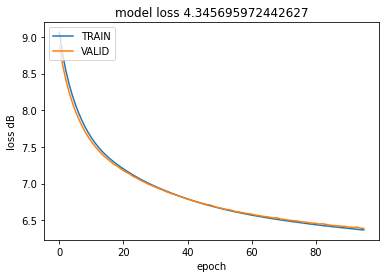

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_86
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 861us/step - loss: 38.0351 - val_loss: 18.1606
Epoch 2/100
6174/6174 [==============================] - 4s 714us/step - loss: 14.0336 - val_loss: 11.3072
Epoch 3/100
6174/6174 [==============================] - 4s 651us/step - loss: 10.2114 - val_loss: 9.3365
Epoch 4/100
6174/6174 [==============================] - 4s 669us/step - loss: 8.8235 - val_loss: 8.3270
Epoch 5/100
6174/6174 [==============================] - 4s 663us/step - loss: 8.0021 - val_loss: 7.6467
Epoch 6/100
6174/6174 [==============================] - 4s 702us/step - loss: 7.4296 - val_loss: 7.1565
Epoch 7/100
6174/6174 [==============================] - 4s 713us/step - loss: 7.0109 - val_loss: 6.7871
Epoch 8/100
6174/6174 [==============================] - 4s 664us/step - loss: 6.6931 - val_loss: 6.5042
Epoch 9/100
6174/6174 [==============================] - 4s 669us/step - loss: 6.4442 - val_loss: 6.2864
Epoch 10/100
6174/6174 [==============================] - 4s 6

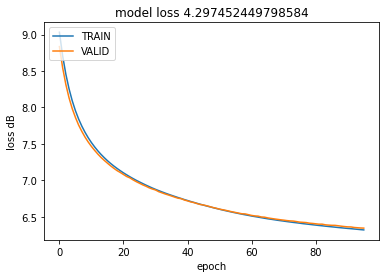

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_87
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 841us/step - loss: 97.8350 - val_loss: 29.9229
Epoch 2/100
6174/6174 [==============================] - 5s 750us/step - loss: 18.4504 - val_loss: 13.2202
Epoch 3/100
6174/6174 [==============================] - 4s 659us/step - loss: 11.5450 - val_loss: 10.2609
Epoch 4/100
6174/6174 [==============================] - 4s 663us/step - loss: 9.5832 - val_loss: 8.9089
Epoch 5/100
6174/6174 [==============================] - 4s 653us/step - loss: 8.5034 - val_loss: 8.0519
Epoch 6/100
6174/6174 [==============================] - 4s 683us/step - loss: 7.7848 - val_loss: 7.4705
Epoch 7/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.2862 - val_loss: 7.0584
Epoch 8/100
6174/6174 [==============================] - 4s 675us/step - loss: 6.9323 - val_loss: 6.7598
Epoch 9/100
6174/6174 [==============================] - 4s 659us/step - loss: 6.6705 - val_loss: 6.5315
Epoch 10/100
6174/6174 [==============================] - 4s 

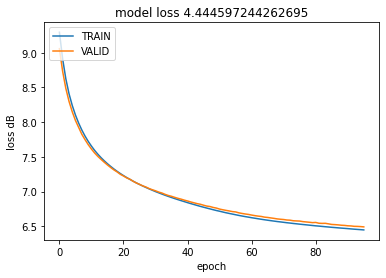

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_88
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 888us/step - loss: 30.3546 - val_loss: 18.6355
Epoch 2/100
6174/6174 [==============================] - 4s 718us/step - loss: 15.0569 - val_loss: 12.1717
Epoch 3/100
6174/6174 [==============================] - 4s 654us/step - loss: 10.8347 - val_loss: 9.6425
Epoch 4/100
6174/6174 [==============================] - 4s 688us/step - loss: 9.0622 - val_loss: 8.4552
Epoch 5/100
6174/6174 [==============================] - 4s 672us/step - loss: 8.1104 - val_loss: 7.7490
Epoch 6/100
6174/6174 [==============================] - 4s 659us/step - loss: 7.5054 - val_loss: 7.2687
Epoch 7/100
6174/6174 [==============================] - 4s 656us/step - loss: 7.0709 - val_loss: 6.9047
Epoch 8/100
6174/6174 [==============================] - 4s 689us/step - loss: 6.7430 - val_loss: 6.6295
Epoch 9/100
6174/6174 [==============================] - 4s 657us/step - loss: 6.4884 - val_loss: 6.4074
Epoch 10/100
6174/6174 [==============================] - 4s 6

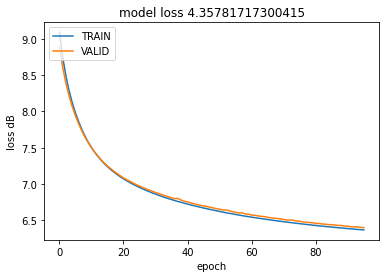

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_89
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 871us/step - loss: 29.6887 - val_loss: 15.6907
Epoch 2/100
6174/6174 [==============================] - 4s 716us/step - loss: 13.0902 - val_loss: 11.2799
Epoch 3/100
6174/6174 [==============================] - 4s 683us/step - loss: 10.3128 - val_loss: 9.5046
Epoch 4/100
6174/6174 [==============================] - 4s 676us/step - loss: 8.9504 - val_loss: 8.4846
Epoch 5/100
6174/6174 [==============================] - 4s 710us/step - loss: 8.1342 - val_loss: 7.8424
Epoch 6/100
6174/6174 [==============================] - 4s 711us/step - loss: 7.5998 - val_loss: 7.3905
Epoch 7/100
6174/6174 [==============================] - 4s 704us/step - loss: 7.2094 - val_loss: 7.0480
Epoch 8/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.9075 - val_loss: 6.7810
Epoch 9/100
6174/6174 [==============================] - 4s 674us/step - loss: 6.6687 - val_loss: 6.5703
Epoch 10/100
6174/6174 [==============================] - 4s 6

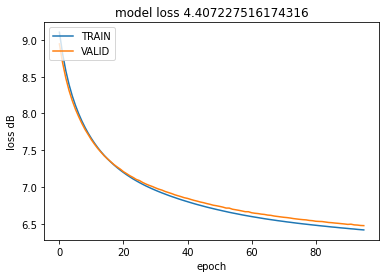

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_90
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 822us/step - loss: 70.9011 - val_loss: 23.6866
Epoch 2/100
6174/6174 [==============================] - 5s 741us/step - loss: 17.9664 - val_loss: 14.1322
Epoch 3/100
6174/6174 [==============================] - 4s 666us/step - loss: 12.1955 - val_loss: 10.5914
Epoch 4/100
6174/6174 [==============================] - 4s 674us/step - loss: 9.7326 - val_loss: 8.9551
Epoch 5/100
6174/6174 [==============================] - 4s 665us/step - loss: 8.5025 - val_loss: 8.0456
Epoch 6/100
6174/6174 [==============================] - 4s 682us/step - loss: 7.7728 - val_loss: 7.4552
Epoch 7/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.2825 - val_loss: 7.0488
Epoch 8/100
6174/6174 [==============================] - 4s 703us/step - loss: 6.9341 - val_loss: 6.7457
Epoch 9/100
6174/6174 [==============================] - 4s 667us/step - loss: 6.6689 - val_loss: 6.5168
Epoch 10/100
6174/6174 [==============================] - 4s 

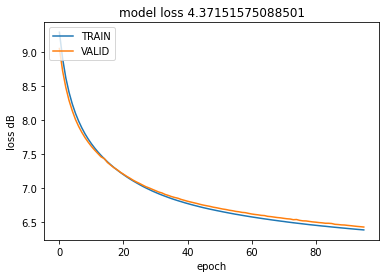

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_91
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 862us/step - loss: 41.0563 - val_loss: 17.8276
Epoch 2/100
6174/6174 [==============================] - 5s 768us/step - loss: 13.9342 - val_loss: 11.3480
Epoch 3/100
6174/6174 [==============================] - 4s 681us/step - loss: 10.2629 - val_loss: 9.2687
Epoch 4/100
6174/6174 [==============================] - 4s 659us/step - loss: 8.8171 - val_loss: 8.2958
Epoch 5/100
6174/6174 [==============================] - 4s 681us/step - loss: 8.0549 - val_loss: 7.7146
Epoch 6/100
6174/6174 [==============================] - 4s 671us/step - loss: 7.5510 - val_loss: 7.2966
Epoch 7/100
6174/6174 [==============================] - 4s 676us/step - loss: 7.1717 - val_loss: 6.9718
Epoch 8/100
6174/6174 [==============================] - 4s 678us/step - loss: 6.8718 - val_loss: 6.7076
Epoch 9/100
6174/6174 [==============================] - 5s 739us/step - loss: 6.6293 - val_loss: 6.5003
Epoch 10/100
6174/6174 [==============================] - 5s 8

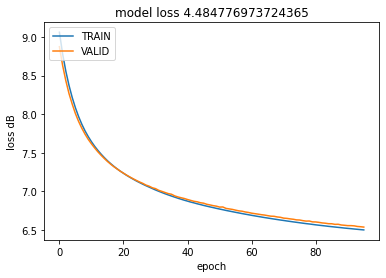

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_92
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 923us/step - loss: 50.9130 - val_loss: 25.9654
Epoch 2/100
6174/6174 [==============================] - 5s 830us/step - loss: 18.6041 - val_loss: 14.5675
Epoch 3/100
6174/6174 [==============================] - 4s 683us/step - loss: 12.7993 - val_loss: 11.4539
Epoch 4/100
6174/6174 [==============================] - 4s 666us/step - loss: 10.5743 - val_loss: 9.8083
Epoch 5/100
6174/6174 [==============================] - 4s 660us/step - loss: 9.2544 - val_loss: 8.7636
Epoch 6/100
6174/6174 [==============================] - 4s 687us/step - loss: 8.3955 - val_loss: 8.0582
Epoch 7/100
6174/6174 [==============================] - 4s 667us/step - loss: 7.7858 - val_loss: 7.5334
Epoch 8/100
6174/6174 [==============================] - 4s 671us/step - loss: 7.3195 - val_loss: 7.1208
Epoch 9/100
6174/6174 [==============================] - 4s 668us/step - loss: 6.9500 - val_loss: 6.7924
Epoch 10/100
6174/6174 [==============================] - 4s

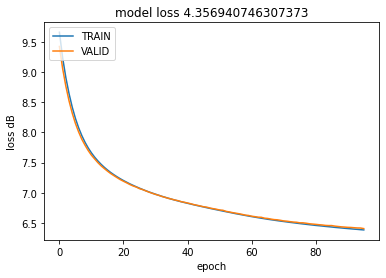

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_93
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 905us/step - loss: 94.1988 - val_loss: 23.6424
Epoch 2/100
6174/6174 [==============================] - 4s 720us/step - loss: 16.5002 - val_loss: 12.8406
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 11.3546 - val_loss: 10.3320
Epoch 4/100
6174/6174 [==============================] - 4s 674us/step - loss: 9.6378 - val_loss: 9.0929
Epoch 5/100
6174/6174 [==============================] - 4s 666us/step - loss: 8.6615 - val_loss: 8.2921
Epoch 6/100
6174/6174 [==============================] - 4s 690us/step - loss: 7.9968 - val_loss: 7.7269
Epoch 7/100
6174/6174 [==============================] - 4s 660us/step - loss: 7.5073 - val_loss: 7.3005
Epoch 8/100
6174/6174 [==============================] - 4s 679us/step - loss: 7.1379 - val_loss: 6.9774
Epoch 9/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.8485 - val_loss: 6.7220
Epoch 10/100
6174/6174 [==============================] - 4s 

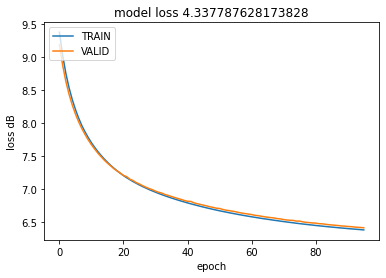

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_94
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 810us/step - loss: 41.4833 - val_loss: 17.6265
Epoch 2/100
6174/6174 [==============================] - 5s 761us/step - loss: 14.0177 - val_loss: 11.7749
Epoch 3/100
6174/6174 [==============================] - 4s 668us/step - loss: 10.6168 - val_loss: 9.6880
Epoch 4/100
6174/6174 [==============================] - 4s 659us/step - loss: 9.0691 - val_loss: 8.5397
Epoch 5/100
6174/6174 [==============================] - 4s 675us/step - loss: 8.1643 - val_loss: 7.8333
Epoch 6/100
6174/6174 [==============================] - 4s 695us/step - loss: 7.5960 - val_loss: 7.3737
Epoch 7/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.2044 - val_loss: 7.0354
Epoch 8/100
6174/6174 [==============================] - 4s 663us/step - loss: 6.9077 - val_loss: 6.7673
Epoch 9/100
6174/6174 [==============================] - 4s 662us/step - loss: 6.6684 - val_loss: 6.5521
Epoch 10/100
6174/6174 [==============================] - 4s 6

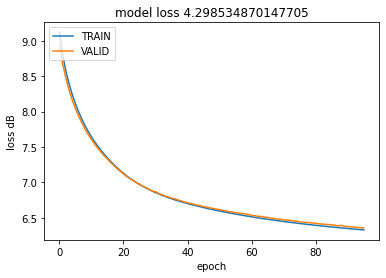

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_95
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 6s 906us/step - loss: 80.8122 - val_loss: 17.8137
Epoch 2/100
6174/6174 [==============================] - 4s 718us/step - loss: 13.9998 - val_loss: 11.7387
Epoch 3/100
6174/6174 [==============================] - 4s 657us/step - loss: 10.7530 - val_loss: 9.7688
Epoch 4/100
6174/6174 [==============================] - 4s 690us/step - loss: 9.1962 - val_loss: 8.5917
Epoch 5/100
6174/6174 [==============================] - 4s 662us/step - loss: 8.2287 - val_loss: 7.8527
Epoch 6/100
6174/6174 [==============================] - 4s 675us/step - loss: 7.6042 - val_loss: 7.3618
Epoch 7/100
6174/6174 [==============================] - 4s 658us/step - loss: 7.1721 - val_loss: 6.9956
Epoch 8/100
6174/6174 [==============================] - 4s 684us/step - loss: 6.8427 - val_loss: 6.7033
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.5746 - val_loss: 6.4655
Epoch 10/100
6174/6174 [==============================] - 4s 6

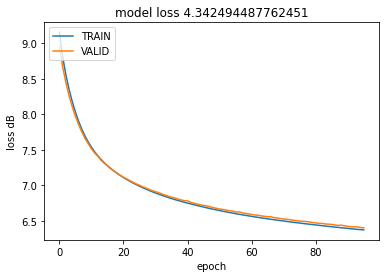

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_96
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 833us/step - loss: 80.7295 - val_loss: 20.6246
Epoch 2/100
6174/6174 [==============================] - 5s 767us/step - loss: 15.0447 - val_loss: 12.0810
Epoch 3/100
6174/6174 [==============================] - 4s 665us/step - loss: 10.7988 - val_loss: 9.8446
Epoch 4/100
6174/6174 [==============================] - 4s 663us/step - loss: 9.1940 - val_loss: 8.6990
Epoch 5/100
6174/6174 [==============================] - 4s 661us/step - loss: 8.2821 - val_loss: 7.9724
Epoch 6/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.6784 - val_loss: 7.4715
Epoch 7/100
6174/6174 [==============================] - 4s 661us/step - loss: 7.2592 - val_loss: 7.1222
Epoch 8/100
6174/6174 [==============================] - 4s 661us/step - loss: 6.9570 - val_loss: 6.8611
Epoch 9/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.7270 - val_loss: 6.6630
Epoch 10/100
6174/6174 [==============================] - 4s 6

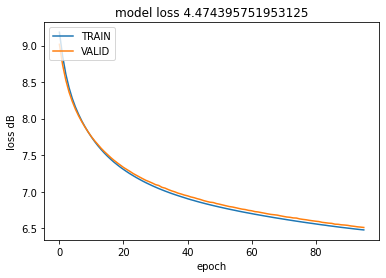

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_97
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 827us/step - loss: 49.2655 - val_loss: 17.5534
Epoch 2/100
6174/6174 [==============================] - 5s 771us/step - loss: 13.1869 - val_loss: 10.6932
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 9.6525 - val_loss: 8.7921
Epoch 4/100
6174/6174 [==============================] - 4s 673us/step - loss: 8.3347 - val_loss: 7.8922
Epoch 5/100
6174/6174 [==============================] - 4s 663us/step - loss: 7.6259 - val_loss: 7.3528
Epoch 6/100
6174/6174 [==============================] - 4s 684us/step - loss: 7.1673 - val_loss: 6.9779
Epoch 7/100
6174/6174 [==============================] - 4s 660us/step - loss: 6.8394 - val_loss: 6.7111
Epoch 8/100
6174/6174 [==============================] - 4s 675us/step - loss: 6.5928 - val_loss: 6.4997
Epoch 9/100
6174/6174 [==============================] - 4s 653us/step - loss: 6.3982 - val_loss: 6.3287
Epoch 10/100
6174/6174 [==============================] - 4s 67

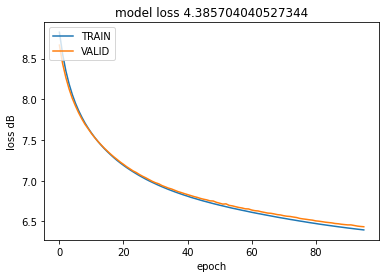

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_98
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 849us/step - loss: 46.3777 - val_loss: 20.7923
Epoch 2/100
6174/6174 [==============================] - 5s 764us/step - loss: 15.7444 - val_loss: 12.5312
Epoch 3/100
6174/6174 [==============================] - 4s 660us/step - loss: 10.9671 - val_loss: 9.7031
Epoch 4/100
6174/6174 [==============================] - 4s 674us/step - loss: 9.0561 - val_loss: 8.4415
Epoch 5/100
6174/6174 [==============================] - 4s 670us/step - loss: 8.0937 - val_loss: 7.7182
Epoch 6/100
6174/6174 [==============================] - 4s 673us/step - loss: 7.4947 - val_loss: 7.2424
Epoch 7/100
6174/6174 [==============================] - 4s 674us/step - loss: 7.0856 - val_loss: 6.9073
Epoch 8/100
6174/6174 [==============================] - 4s 686us/step - loss: 6.7859 - val_loss: 6.6481
Epoch 9/100
6174/6174 [==============================] - 4s 671us/step - loss: 6.5499 - val_loss: 6.4380
Epoch 10/100
6174/6174 [==============================] - 4s 6

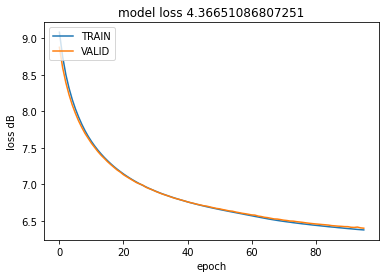

mae_4-320_lr:0.0001_batch:32-1_lr:0.0001_batch:32_e:100_b:32_random_99
Epoch 1/100


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6174/6174 [==============================] - 5s 841us/step - loss: 115.7046 - val_loss: 34.5856
Epoch 2/100
6174/6174 [==============================] - 5s 762us/step - loss: 22.0589 - val_loss: 14.9220
Epoch 3/100
6174/6174 [==============================] - 4s 671us/step - loss: 12.9637 - val_loss: 11.4199
Epoch 4/100
6174/6174 [==============================] - 4s 677us/step - loss: 10.5689 - val_loss: 9.7963
Epoch 5/100
6174/6174 [==============================] - 4s 657us/step - loss: 9.2904 - val_loss: 8.8367
Epoch 6/100
6174/6174 [==============================] - 4s 705us/step - loss: 8.5051 - val_loss: 8.2156
Epoch 7/100
6174/6174 [==============================] - 4s 668us/step - loss: 7.9651 - val_loss: 7.7581
Epoch 8/100
6174/6174 [==============================] - 4s 666us/step - loss: 7.5641 - val_loss: 7.4146
Epoch 9/100
6174/6174 [==============================] - 4s 683us/step - loss: 7.2557 - val_loss: 7.1409
Epoch 10/100
6174/6174 [==============================] - 4

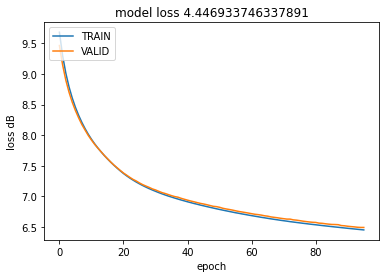

In [7]:
for i in range(1,100):
    hidden_layer_kernel_initializer = keras.initializers.RandomUniform(minval=-10, maxval=10, seed=4*i)
    hidden_layer_bias_initializer = keras.initializers.RandomUniform(minval=-10, maxval=10, seed=4*i+1)
    output_layer_kernel_initializer = keras.initializers.RandomUniform(minval=-10, maxval=10, seed=4*i+2)
    output_layer_bias_initializer = keras.initializers.RandomUniform(minval=-10, maxval=10, seed=4*i+3)
    model = keras.models.Sequential([
        keras.layers.Dense(320,activation="tanh", input_dim=4,kernel_initializer=hidden_layer_kernel_initializer ,bias_initializer=hidden_layer_bias_initializer),
        keras.layers.Dense(1, activation="linear", kernel_initializer=output_layer_kernel_initializer ,bias_initializer=output_layer_bias_initializer)
    ])

    learning_rate = 0.0001
    optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="mean_absolute_error", optimizer=optimizer)

    epochs=100
    batch=32


    model_name = f"mae_{model.layers[0].input_shape[1]}"
    for layer in model.layers:
        model_name+=f"-{layer.output_shape[1]}_lr:{learning_rate}_batch:{batch}"
    model_name += f"_e:{epochs}_b:{batch}_random_{i}"
    print(model_name)


    history = model.fit(TRAINING_DATA, TRAINING_VAL, epochs=epochs, batch_size=batch, validation_data=(VALIDATION_DATA, VALIDATION_VAL))
    model.save(f"MODELS/{model_name}.h5")

    from math import log10

    scores = model.evaluate(TEST_DATA, TEST_VAL, batch_size=20)
    plt.plot([10*log10(loss) for loss in history.history['loss'][4:]])
    plt.plot([10*log10(loss) for loss in history.history['val_loss'][4:]])
    plt.title(f'model loss {scores}')
    plt.ylabel('loss dB')
    plt.xlabel('epoch')
    plt.legend(['TRAIN', 'VALID'], loc='upper left')
    plt.savefig(f"TRAINING_PROCESS/{model_name}.png")
    plt.show()


In [16]:
TEST_DATA = TEST_DATA.iloc[:30,:]
PREDICTIONS = pd.DataFrame(model.predict(TEST_DATA, verbose=0))
PREDICTIONS.columns=["PREDICITONS"]

TEST_VAL = TEST_VAL.iloc[:30,:]
TEST_VAL.columns=["TEST_VAL"]
TEST_VAL = TEST_VAL.reset_index(drop=True)

result=pd.concat([PREDICTIONS, TEST_VAL], axis=1)
result["ERROR"] = result["PREDICITONS"] - result["TEST_VAL"]
result.to_csv("MLP.csv")
